In [1]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import norm
channel_list = ["Tracks_pt", "Tracks_dZSig", "Tracks_d0Sig", "ECAL_energy",
"HBHE_energy", "Pix_1", "Pix_2", "Pix_3", "Pix_4", "Tib_1", "Tib_2",
"Tib_3", "Tib_4", "Tob_1", "Tob_2", "Tob_3", "Tob_4", "Tob_5",
"Tob_6", "Tid_1", "Tec_1", "Tec_2", "Tec_3"]


# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

In [2]:
m0_scale    = 14
m0_min      = 2.4
m0_max      = 16
mtrue_bins = np.arange(m0_min, m0_max, .4)
mae_min  =0
mae_max  = 10.5
mae_bins = np.arange(mae_min, mae_max, .5)
mre_bins = np.arange(0, 1.05, .05)
mass_bins = np.arange(3600,14000,400)/1000.

In [108]:
def true_prediction_gaussian_filt(data_file = "../mass_trainer_aToTauTau_m1p2To17p2_v2_5ch/INFERENCE_DATA/INFERENCE_5_channels_aToTauTau_m1p2To17p2_pT30To180_Upsilon_2Tau/*"): 
    data_file = glob.glob(data_file)[0]
    infile = open(f"{data_file}", "rb")
    data = pickle.load(infile)
    print(f"loaded data file ------>  {data_file}")
    infile.close()
    bin_width=0.4

    m_true_u = data["m_true"]
    m_pred_u = data["m_pred"]
    jet_massu = data["m0"]
    # e2e_res = np.mean(abs(m_true_u - m_pred_u))
    # pf_res = np.mean(abs(jet_massu - m_pred_u))
    # e2e_res = np.std(m_true_u - m_pred_u)
    # pf_res = np.std(jet_massu - m_pred_u)
    # print("E2E MAE   :",e2e_res)
    # print("PF MAE   :",pf_res)
    # bin_width = 0.4

    mut, stdt = norm.fit(m_true_u)

    mu, std = norm.fit(m_pred_u)
    x = np.linspace(m0_min-1.2,m0_max+1.2, num=1000)
    y = norm.pdf(x, mu, std)

    muj, stdj = norm.fit(jet_massu)
    xj = np.linspace(m0_min-1.2,m0_max+1.2, num=1000)
    yj = norm.pdf(xj, muj, stdj)

    # Plot error bars


    # Check 1D m_pred
    # Extebded version
    fig, ax = plt.subplots(figsize=(15,15))
    # plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', label='$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
    plt.hist(m_pred_u, density=True,range=(m0_min-1.2,m0_max+1.2),bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', linestyle='-', color='red', linewidth=2)
    plt.hist(jet_massu, density=True,range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_width)), histtype='step', linestyle='--', color='black', linewidth=2)
    plt.plot(x, y, color='red',label=f'E2E Prediction mu:{np.round(mu,2)}  std:{np.round(std,2)}')
    plt.plot(xj, yj, color='black',label=f'PF mu:{np.round(muj,2)}  std:{np.round(stdj,2)}')
    plt.axvline(x= mut,linestyle='--',label=f'True mu: {np.round(mut,3)}')
    plt.xlim(m0_min-1.2,m0_max+1.2)
    plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6))
    plt.grid(color='r', linestyle='--', linewidth=.1)
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events/ 0.4 [GeV]')
    # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
    plt.legend(loc='best')
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    # if save: plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()
    
    fig, ax = plt.subplots(figsize=(20,15))
    plt.hist2d(np.squeeze(m_true_u), np.squeeze(m_pred_u), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
    plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
    plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
    plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
    plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
    plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
    plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
    plt.grid(color='r', linestyle='--', linewidth=.4)
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    # plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()

# U to 2tau validation sample

loaded data file ------>  ../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_Upsilon_2Tau/epoch30_val_pseudoscalar_mae1.8924_inference_data.pkl


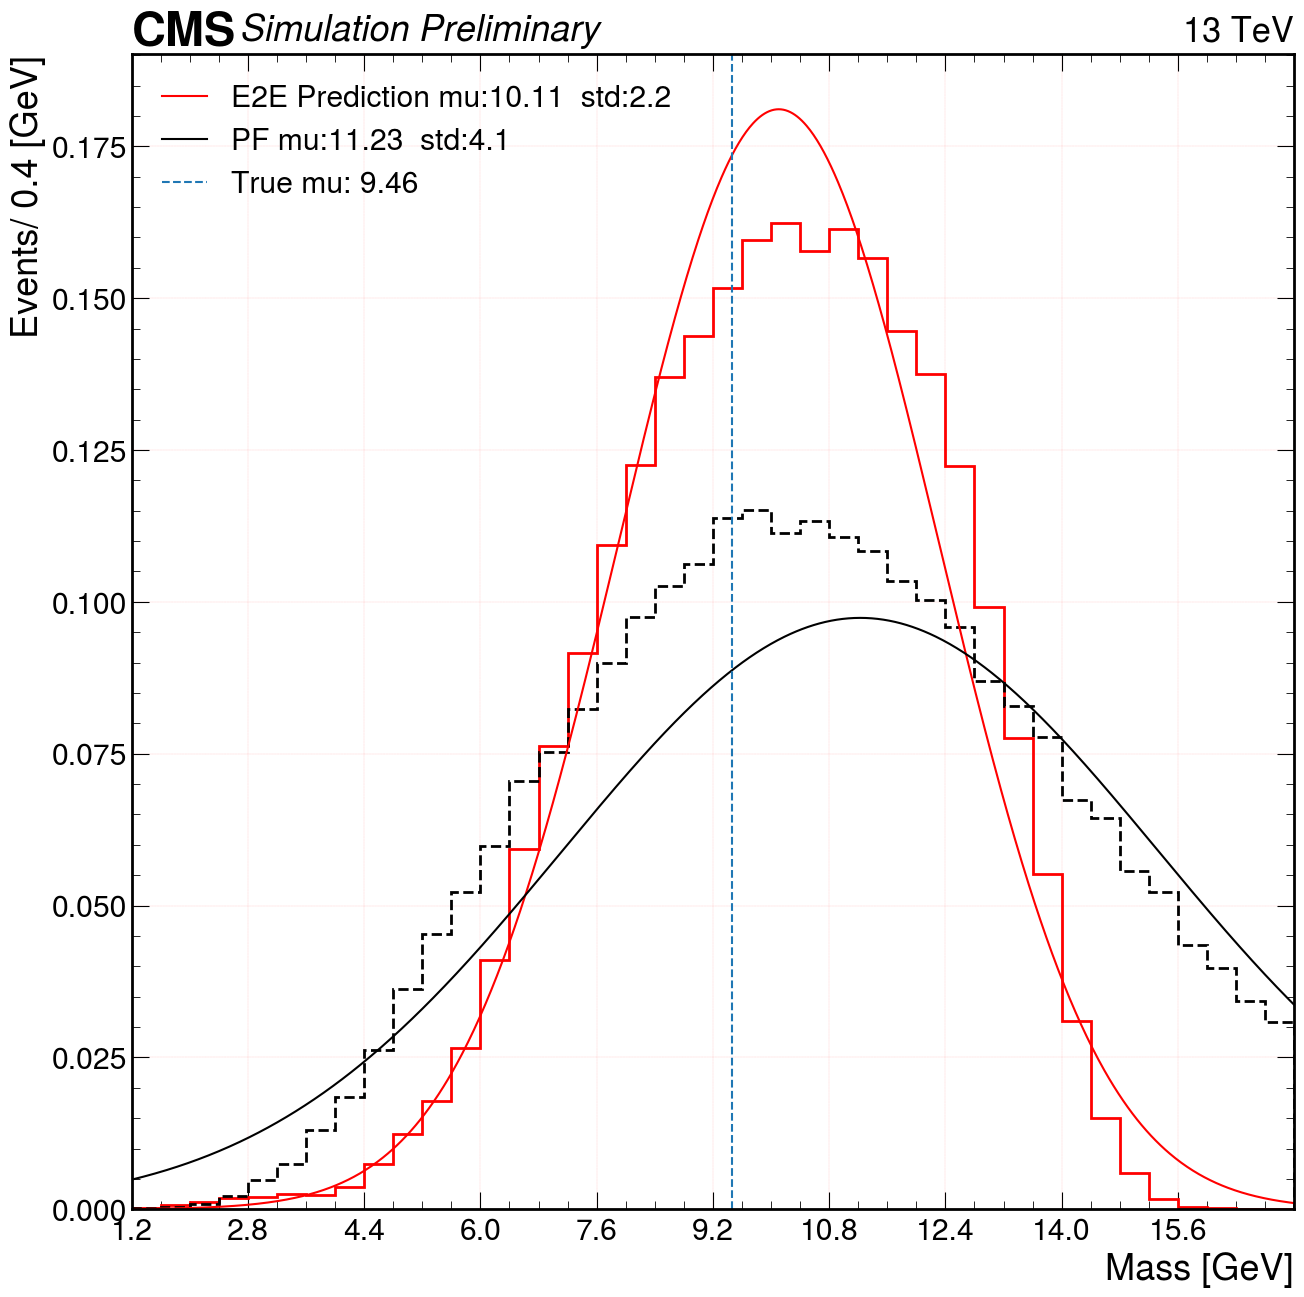

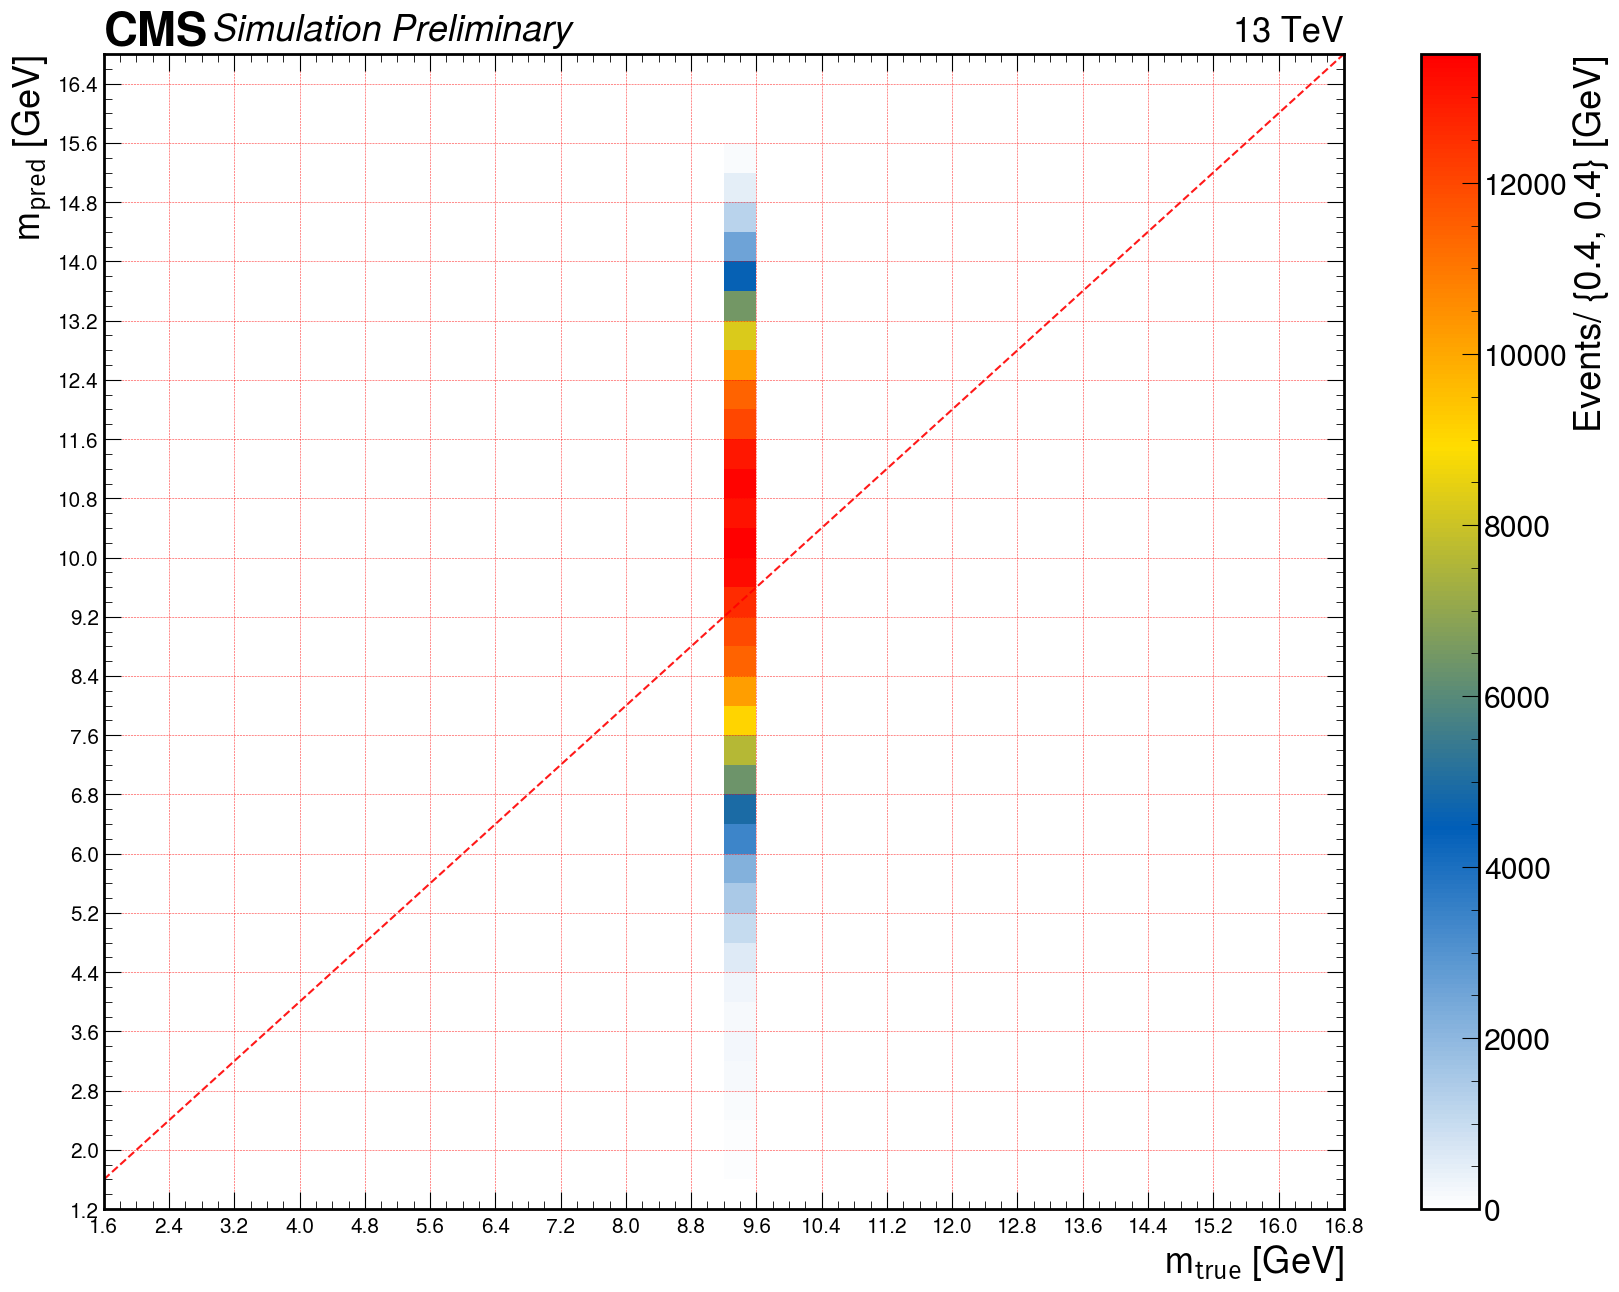

In [109]:
true_prediction_gaussian_filt(data_file = "../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_Upsilon_2Tau/*")

# Signal Mass = 3.7 GeV

loaded data file ------>  ../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_3p7_H_AA_4Tau/epoch30_val_pseudoscalar_mae2.4559_inference_data.pkl


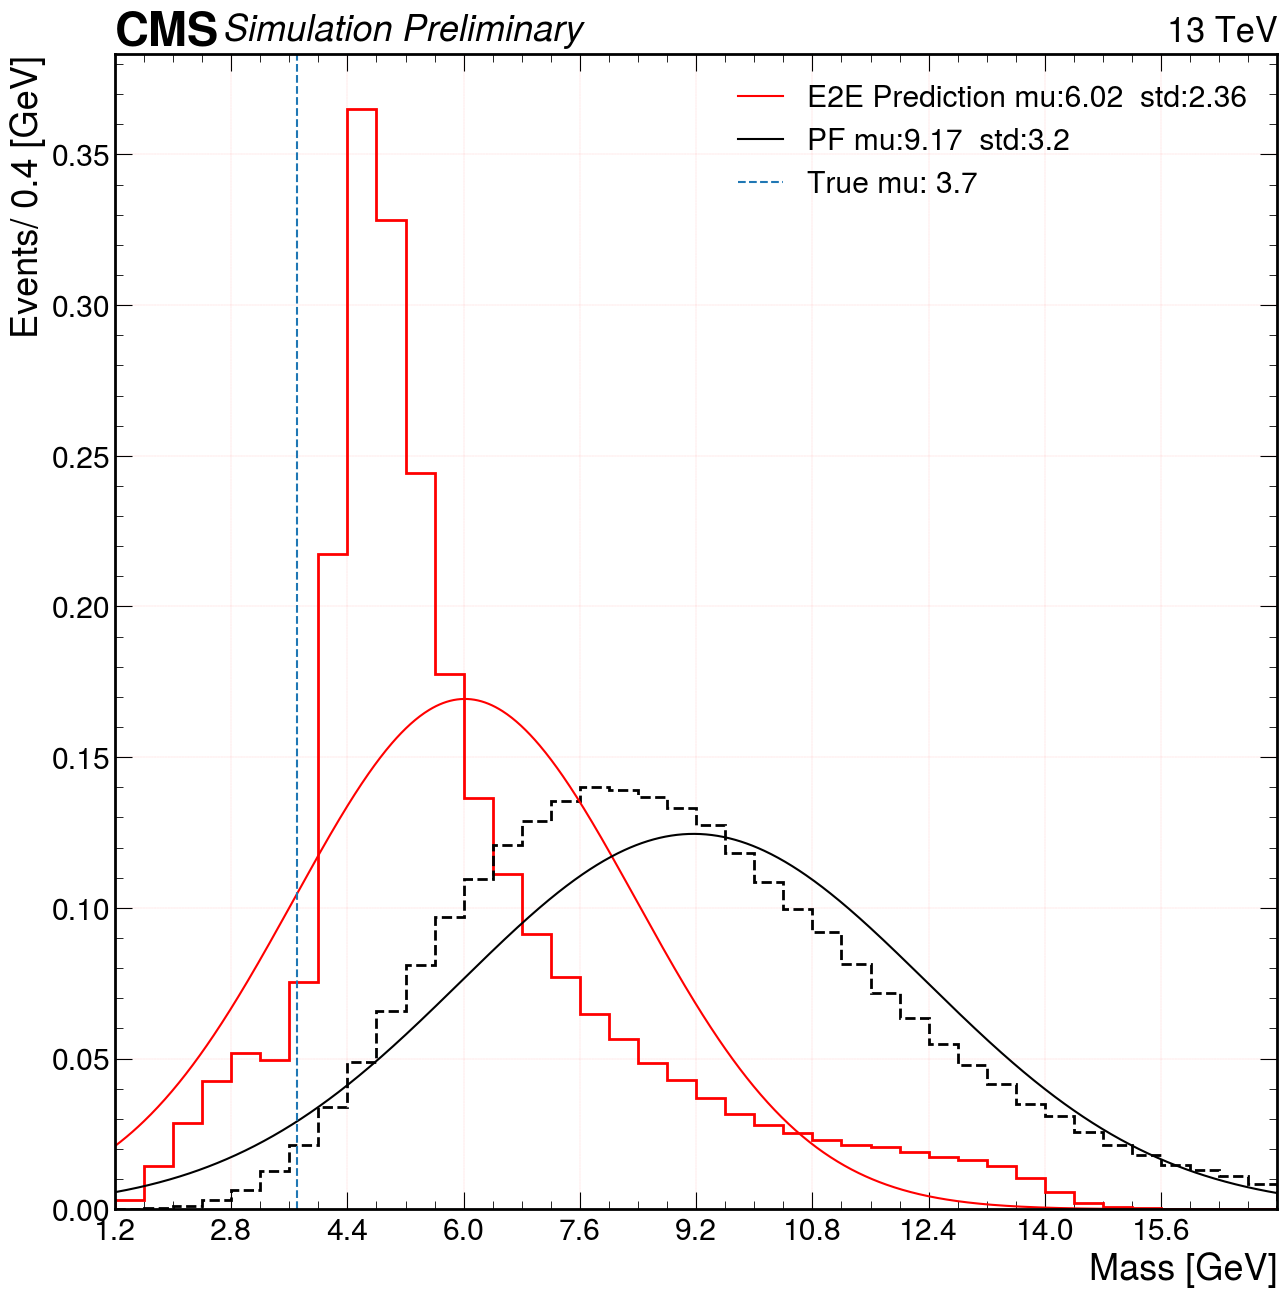

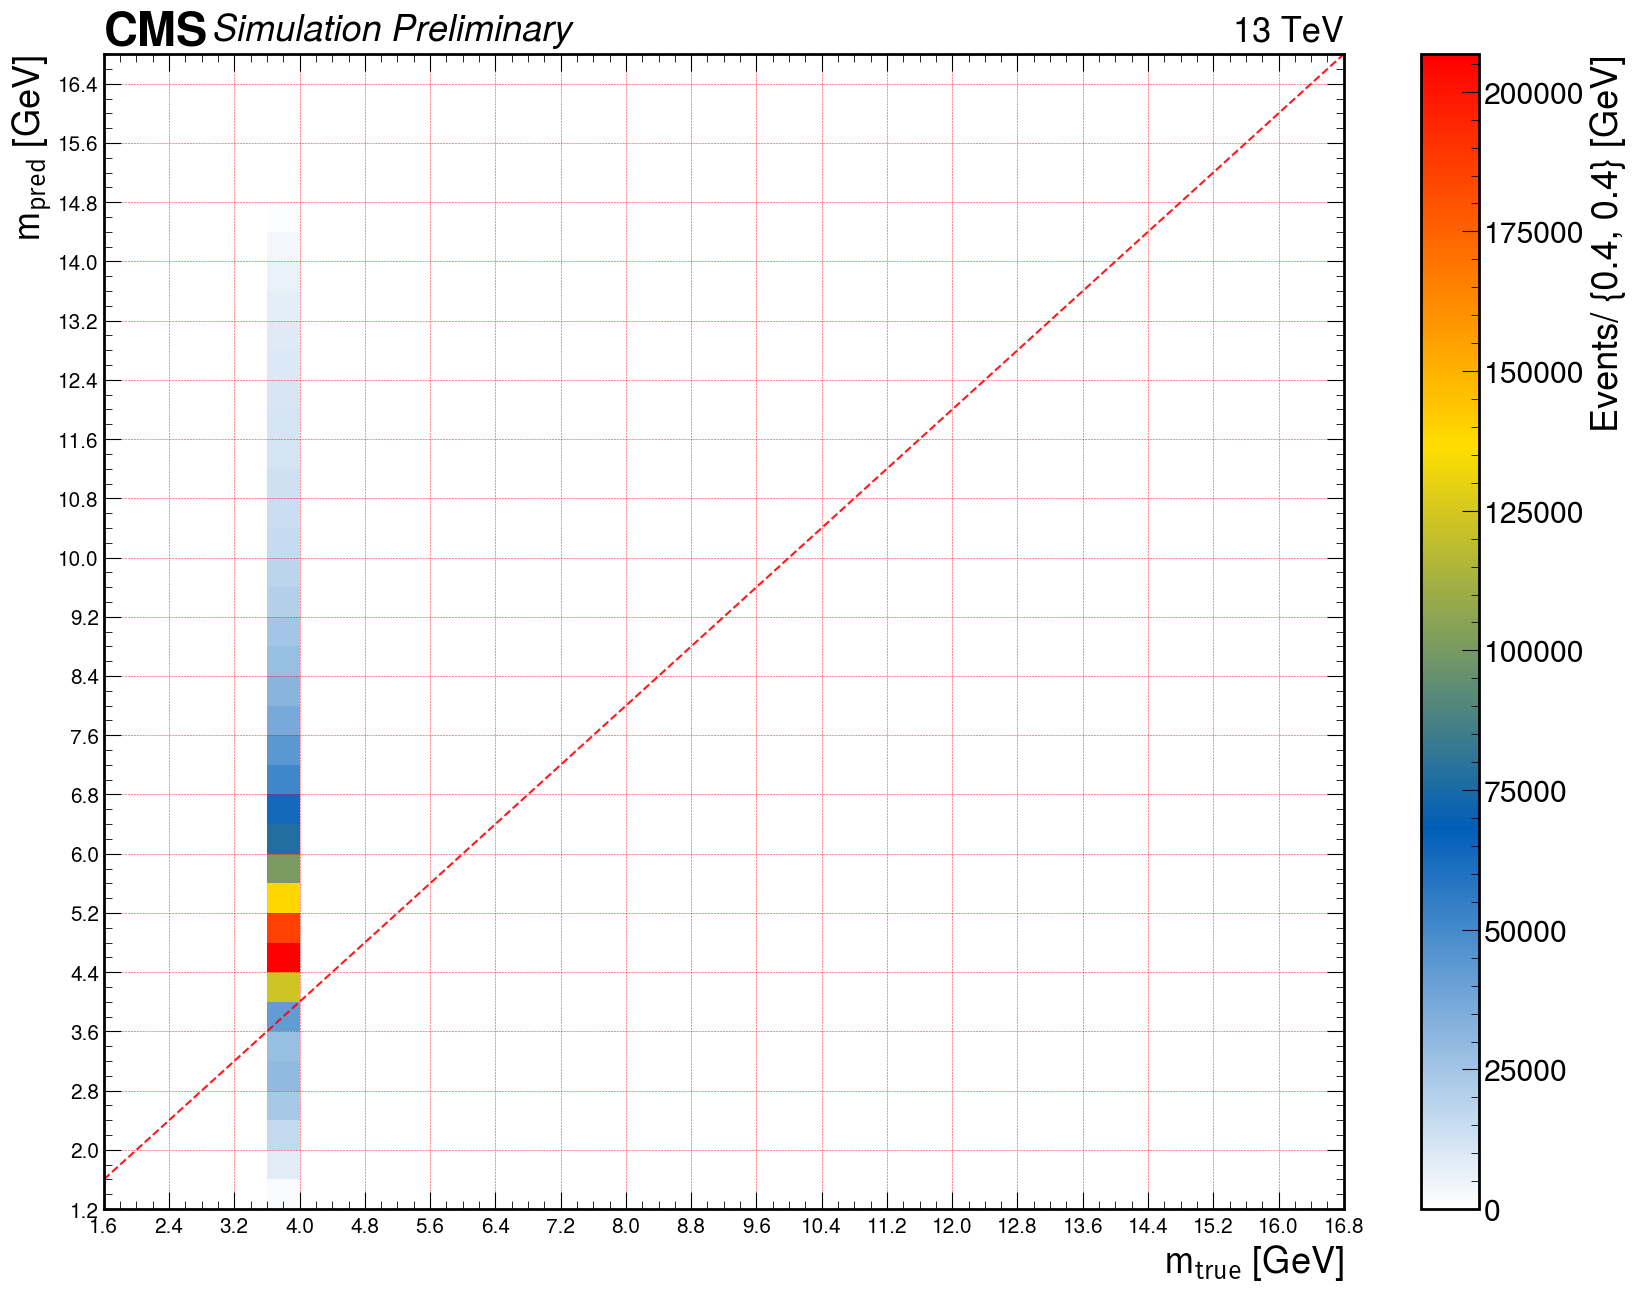

In [93]:
true_prediction_gaussian_filt(data_file = "../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_3p7_H_AA_4Tau/*")

# Signal Mass = 4 GeV

loaded data file ------>  ../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_4_H_AA_4Tau/epoch30_val_pseudoscalar_mae2.2577_inference_data.pkl


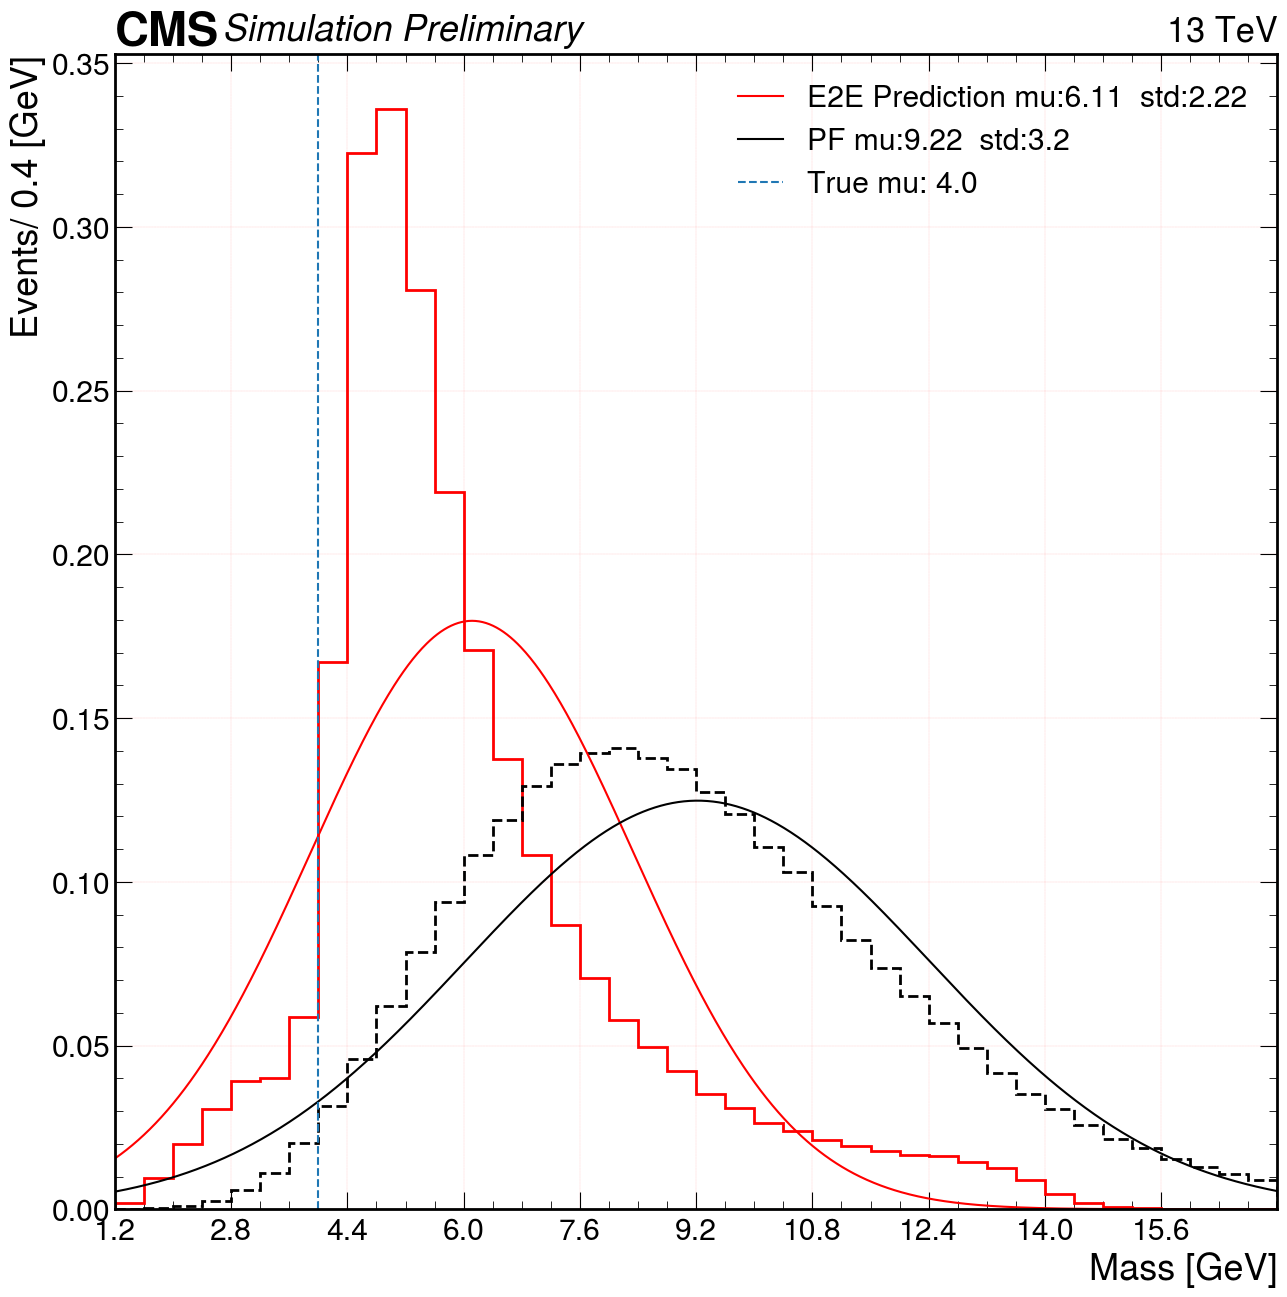

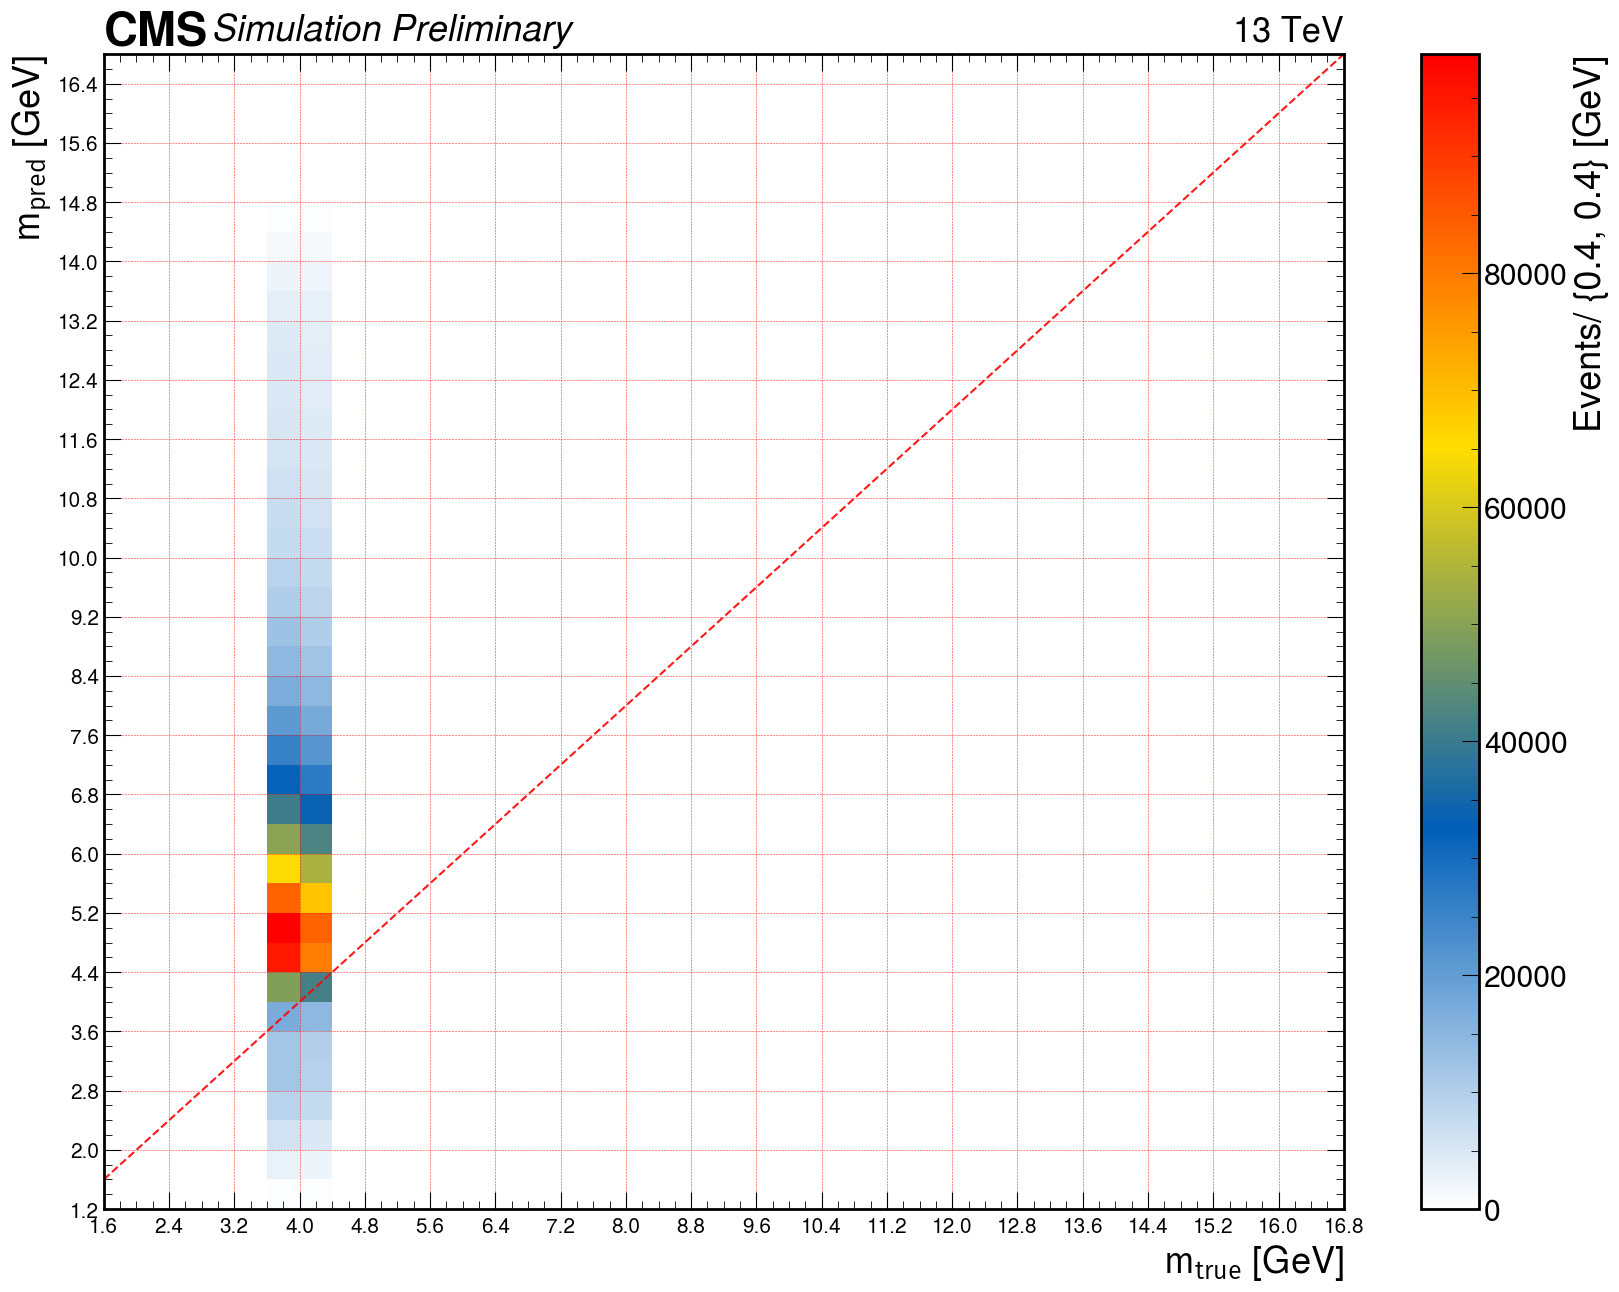

In [94]:
true_prediction_gaussian_filt(data_file = "../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_4_H_AA_4Tau/*")


# Signal Mass = 5 GeV

loaded data file ------>  ../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_5_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.9237_inference_data.pkl


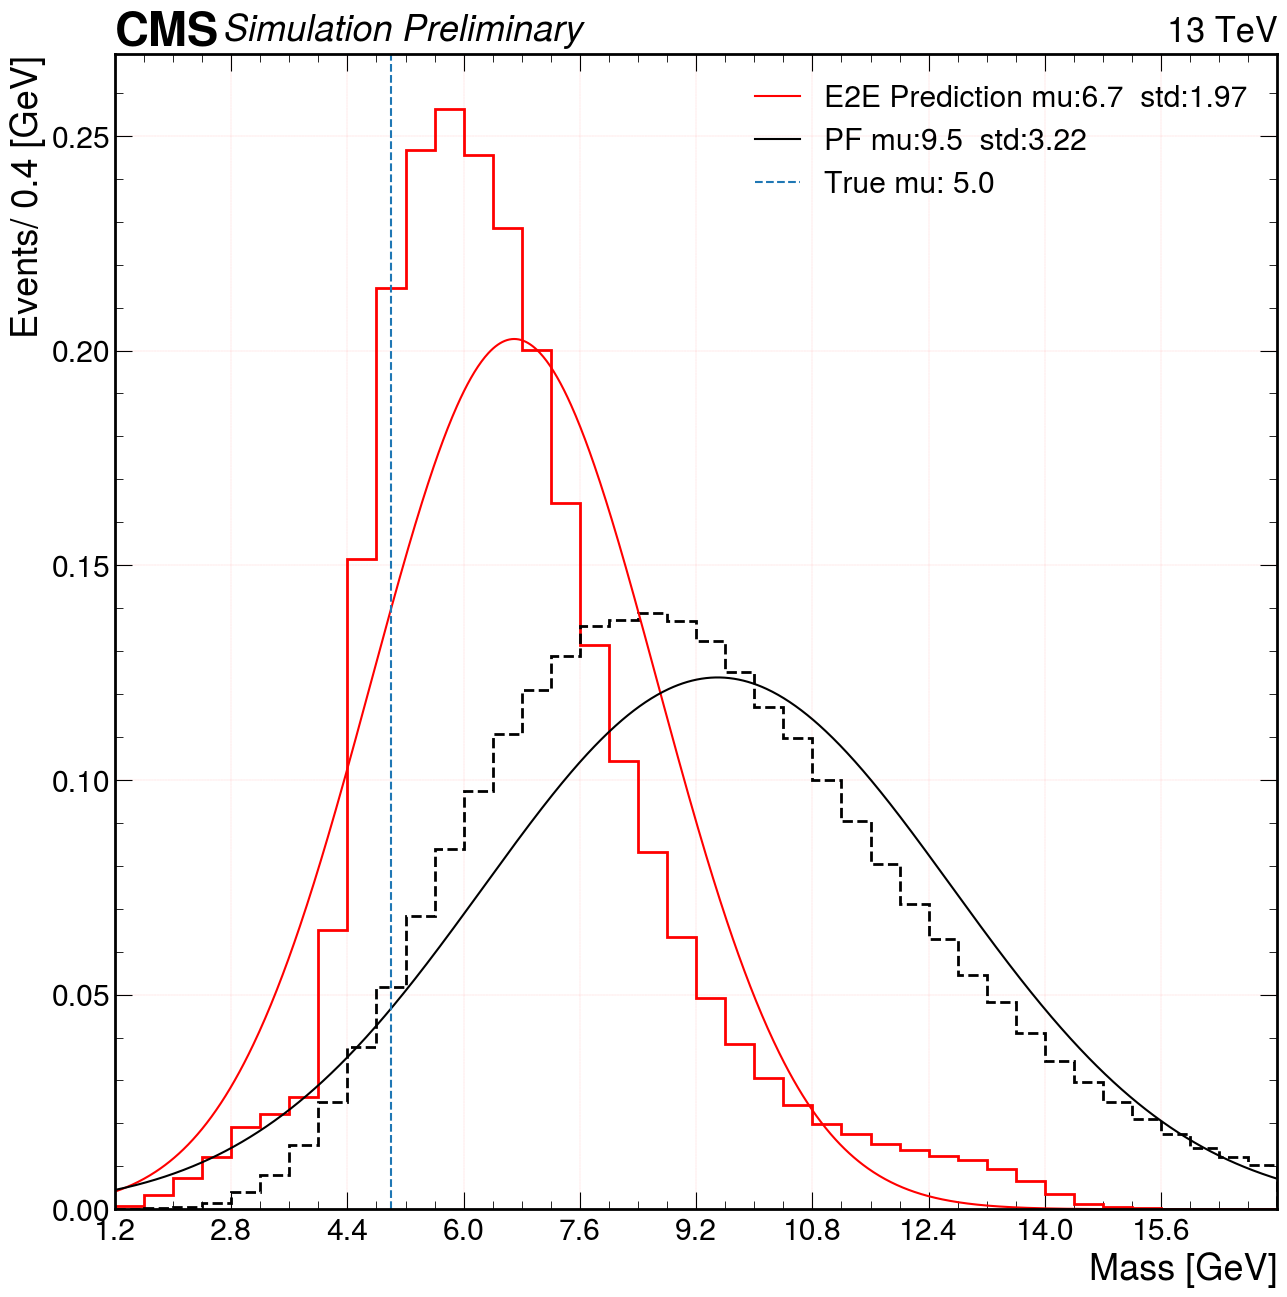

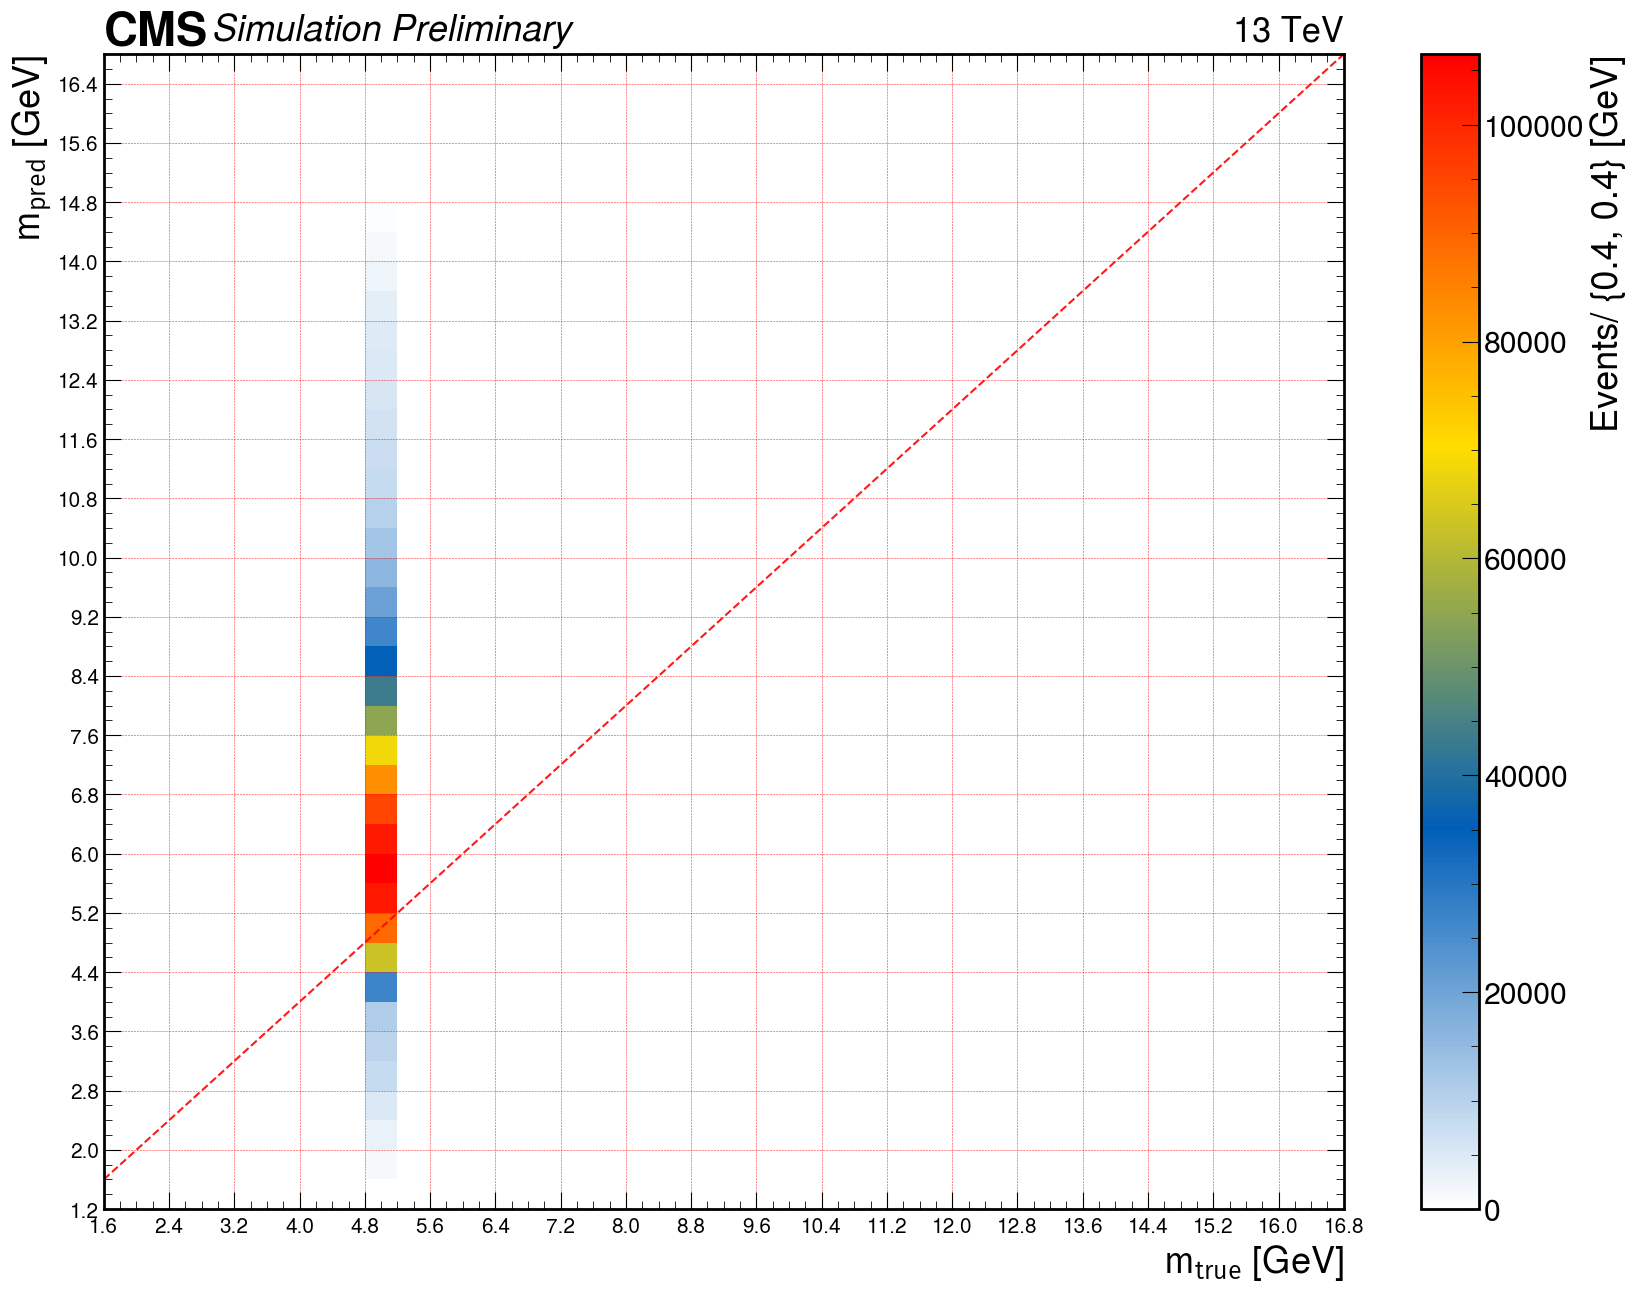

In [95]:
true_prediction_gaussian_filt(data_file = "../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_5_H_AA_4Tau/*")


# Signal Mass = 6 GeV

loaded data file ------>  ../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.9026_inference_data.pkl


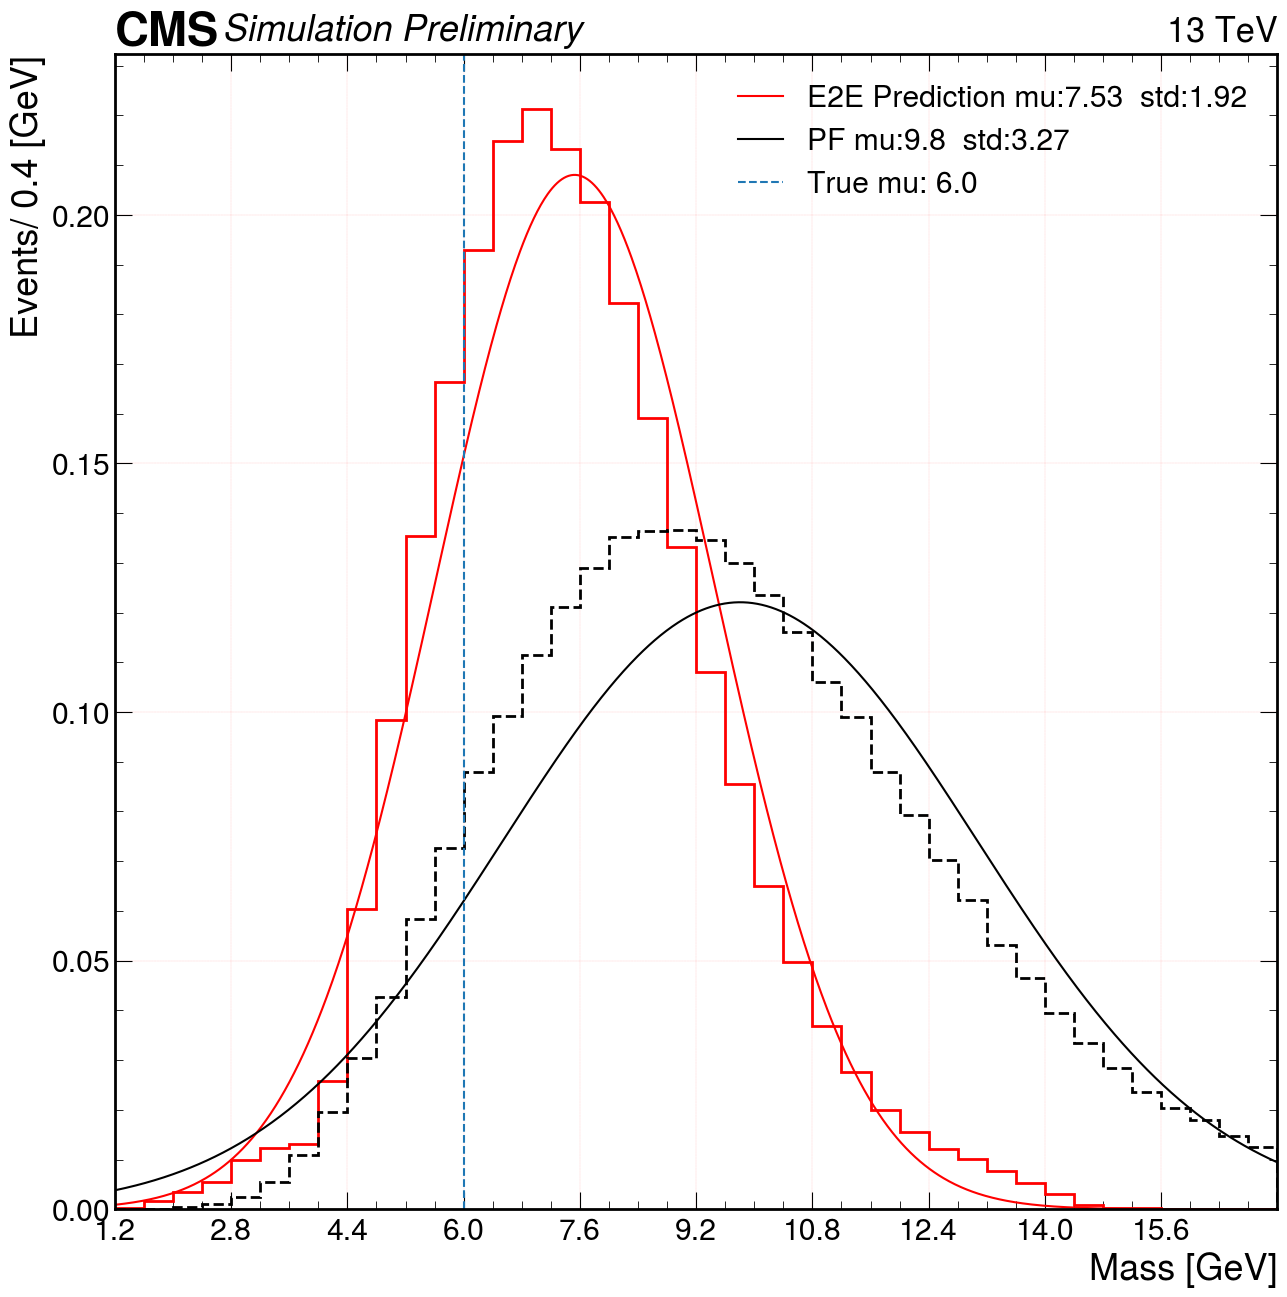

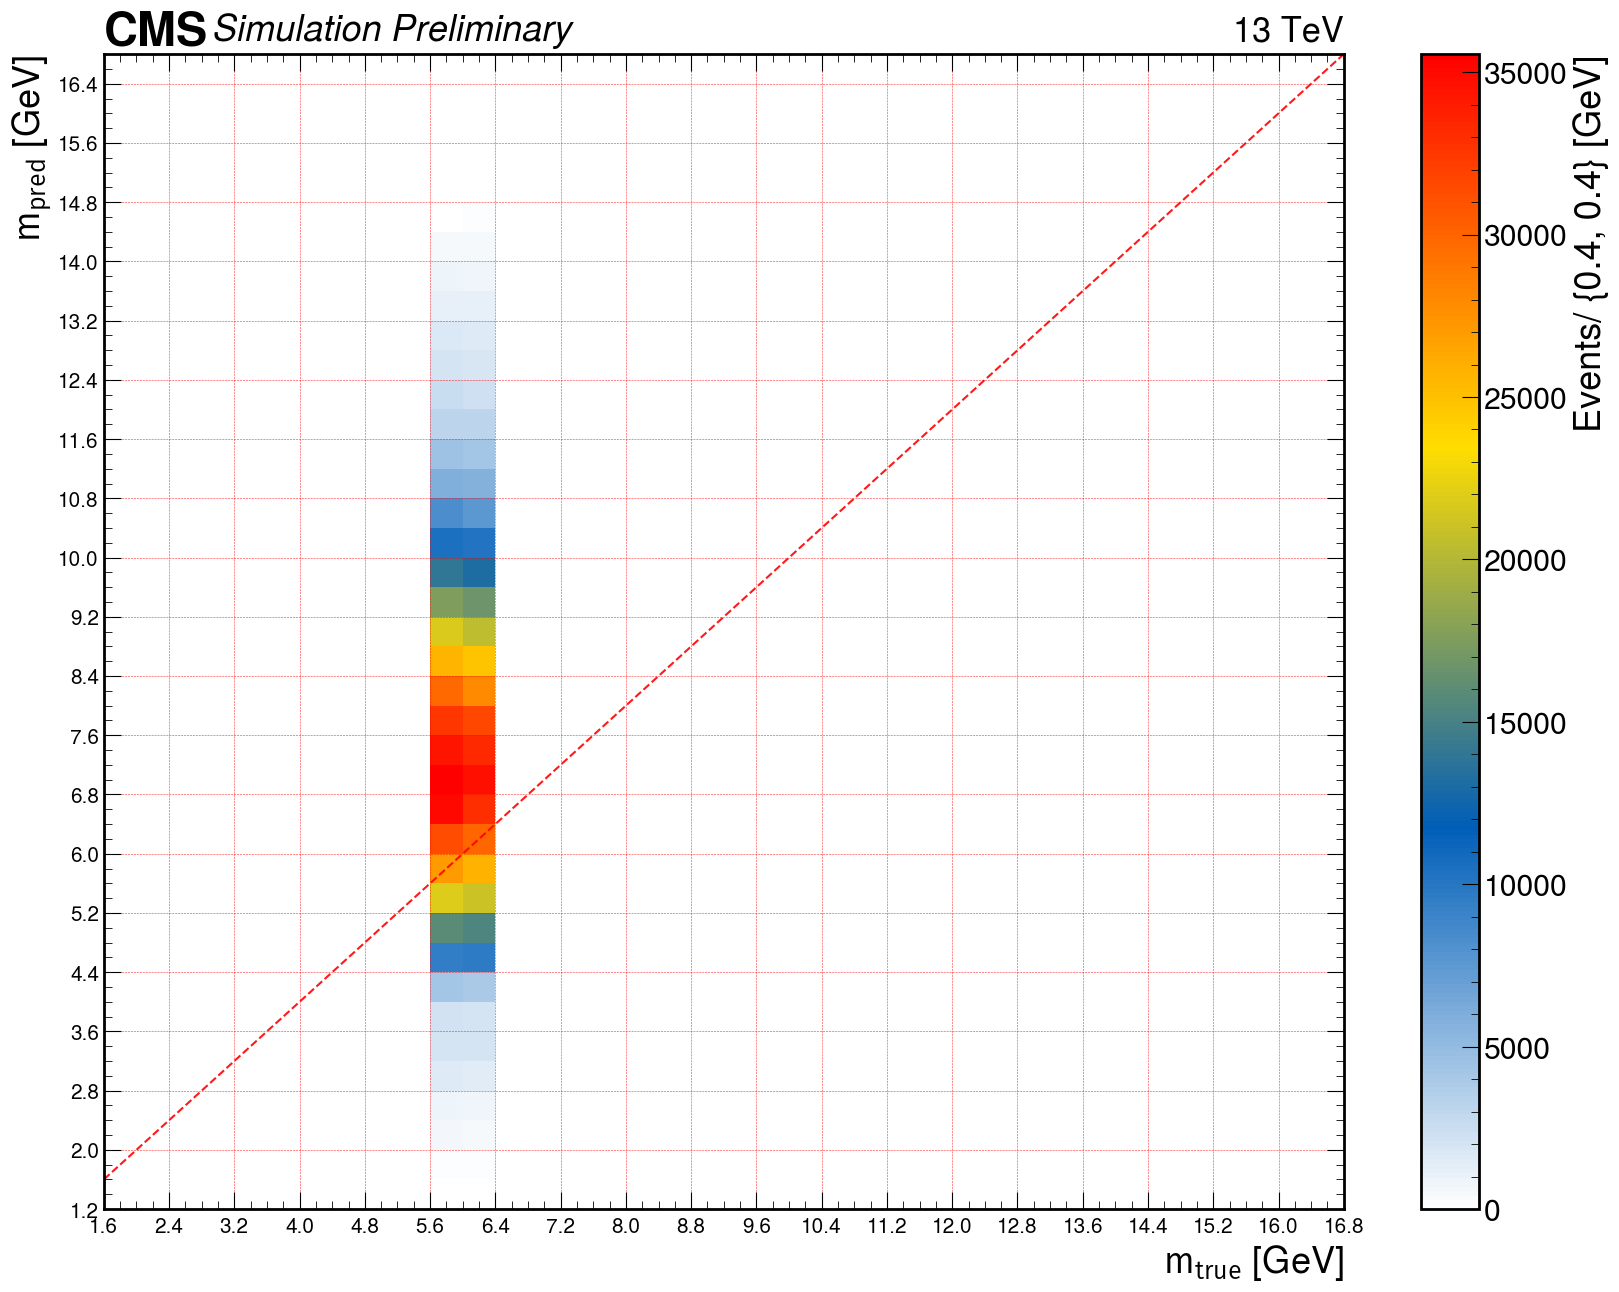

In [97]:
true_prediction_gaussian_filt("../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_6_H_AA_4Tau/*")

# Signal Mass= 8 GeV

loaded data file ------>  ../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_8_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.9992_inference_data.pkl


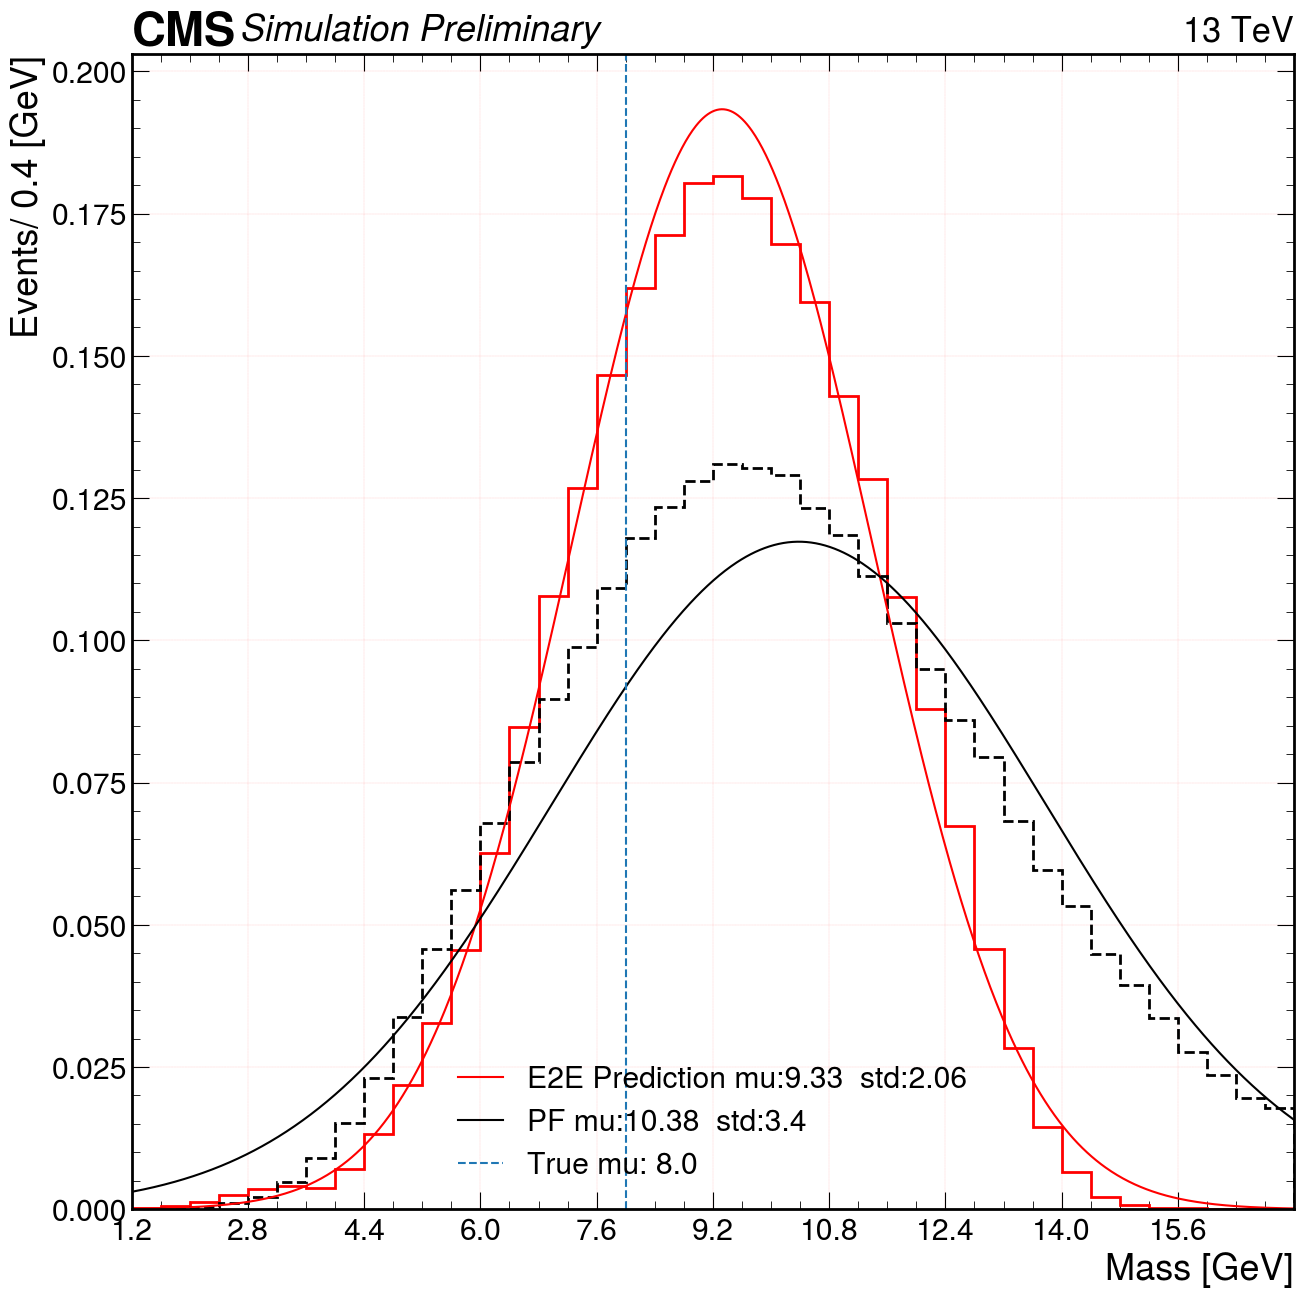

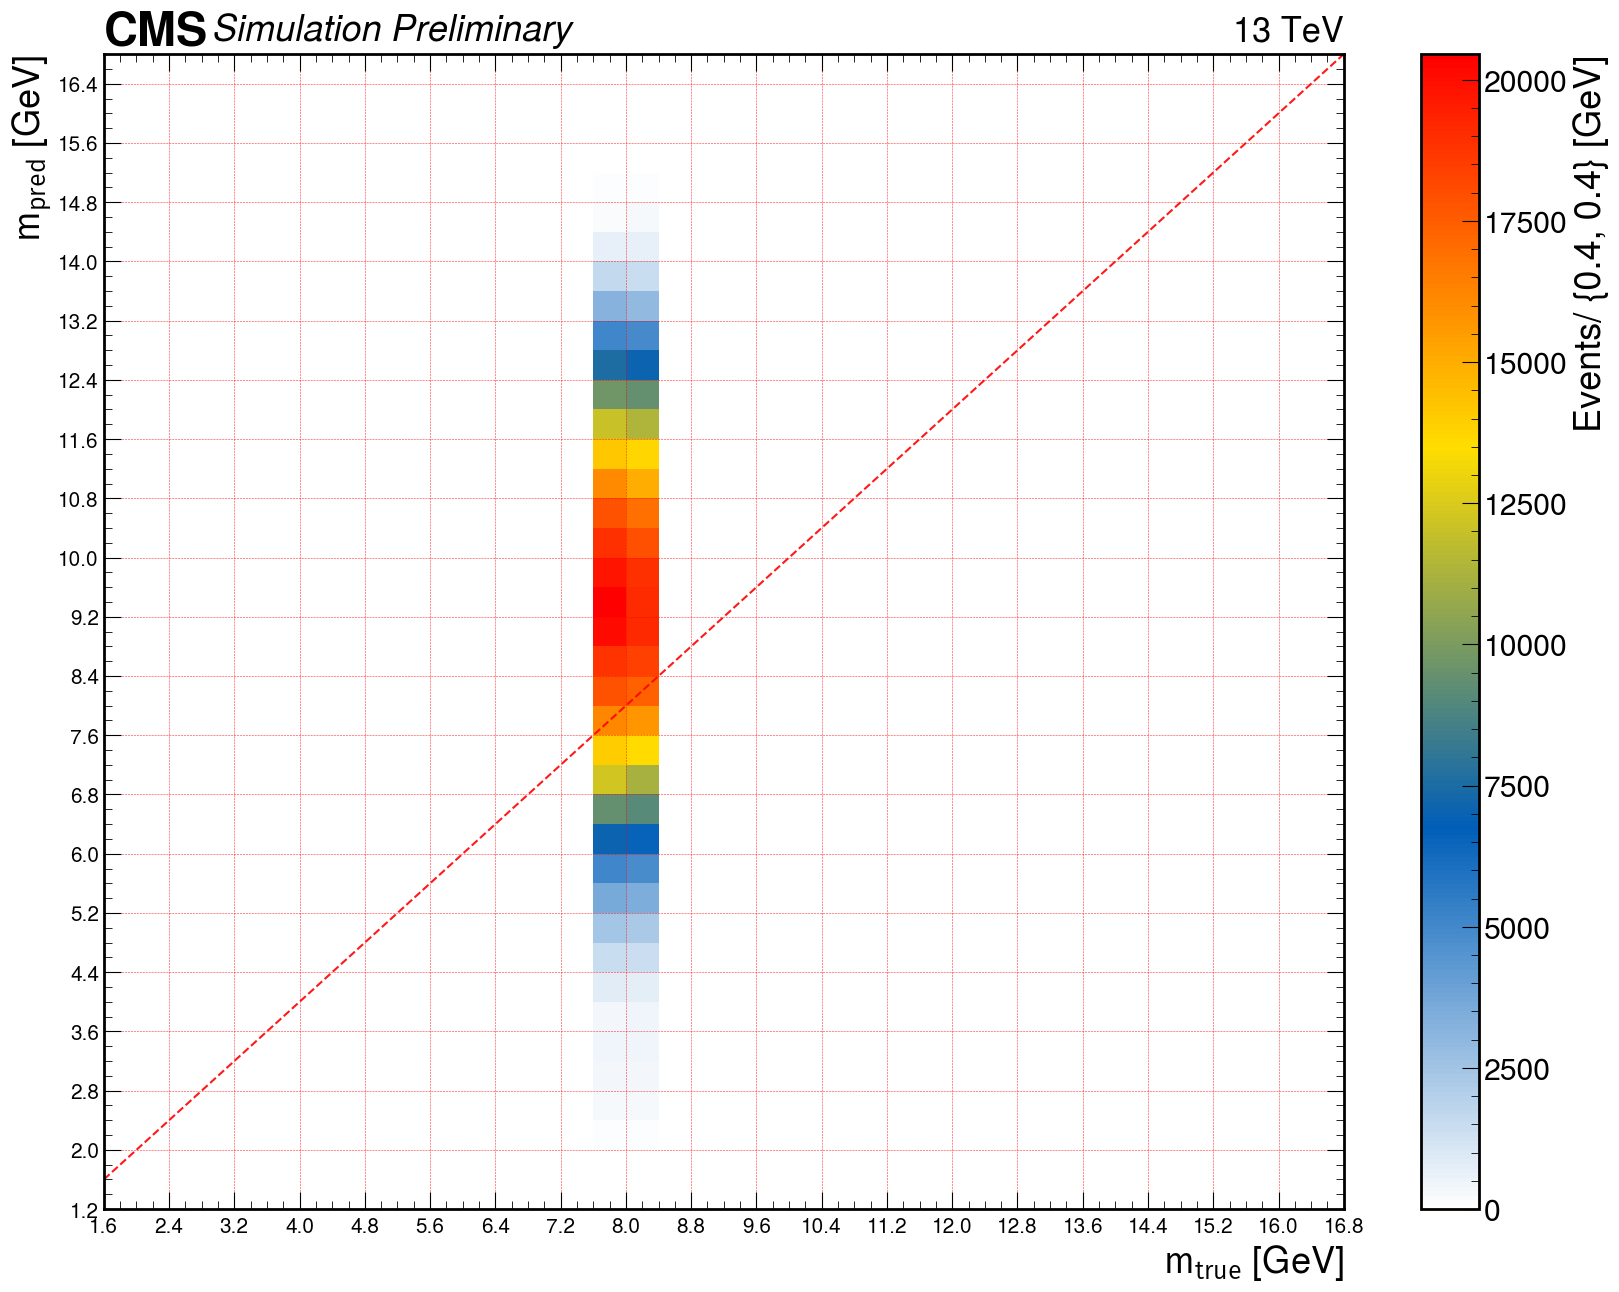

In [98]:
true_prediction_gaussian_filt(data_file = "../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_8_H_AA_4Tau/*")


# Signal Mass =10 Gev

loaded data file ------>  ../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_10_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.9033_inference_data.pkl


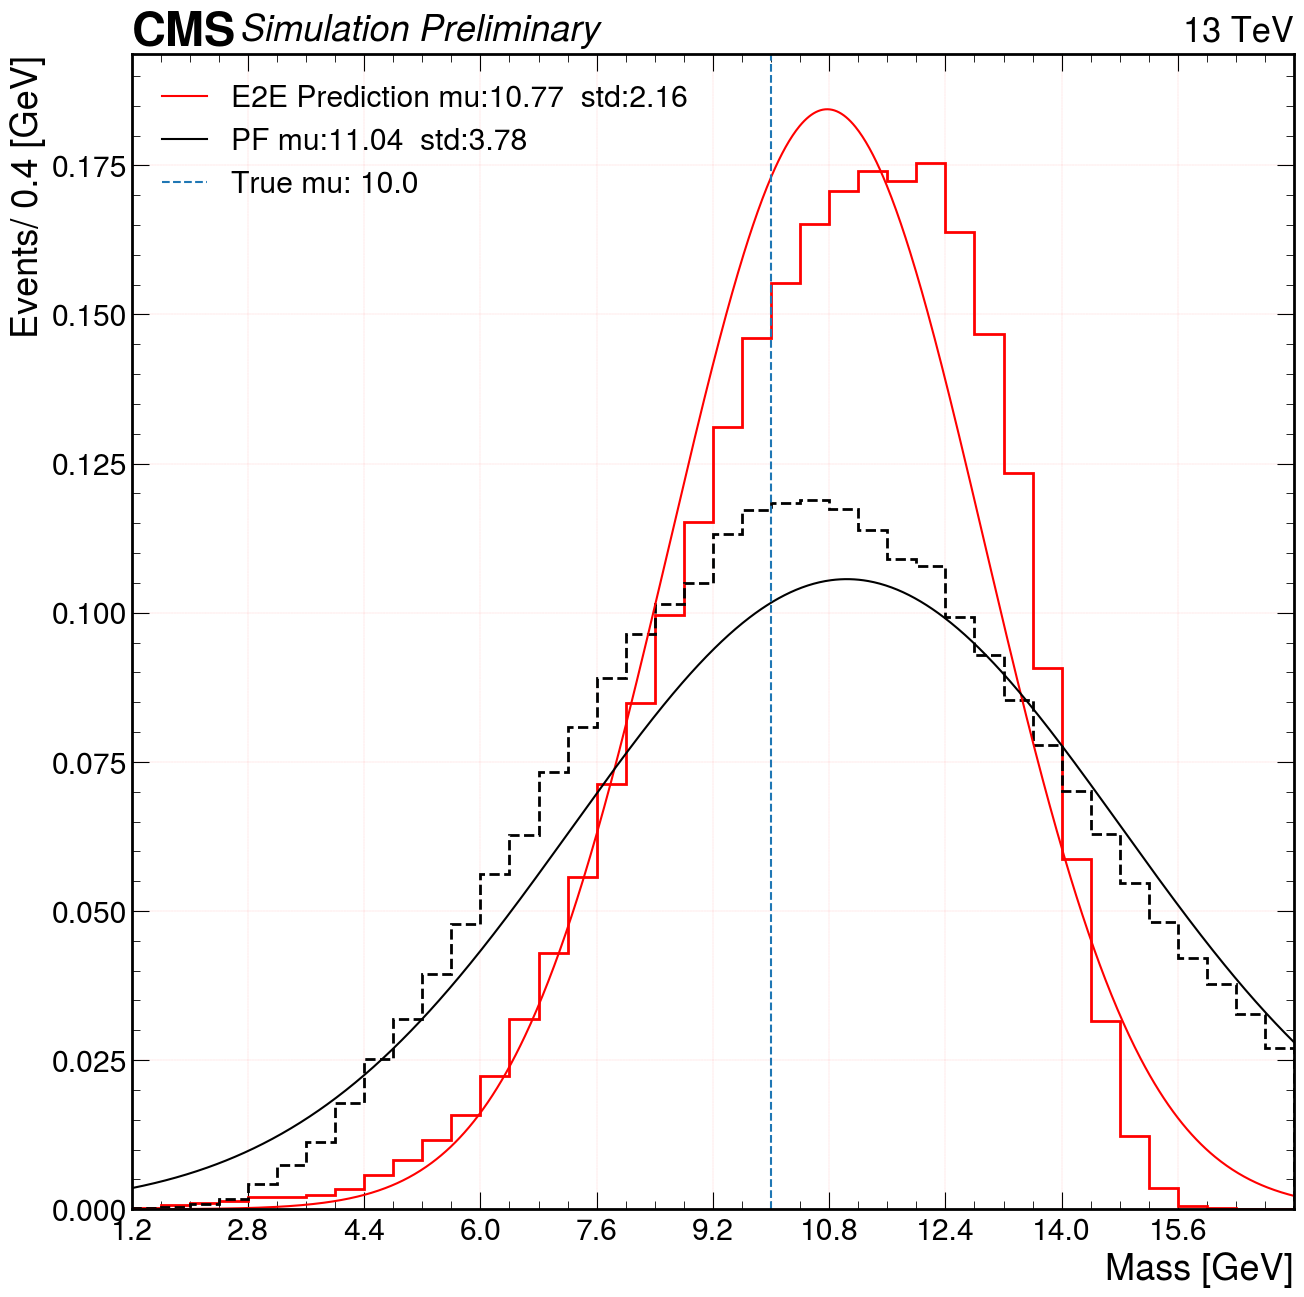

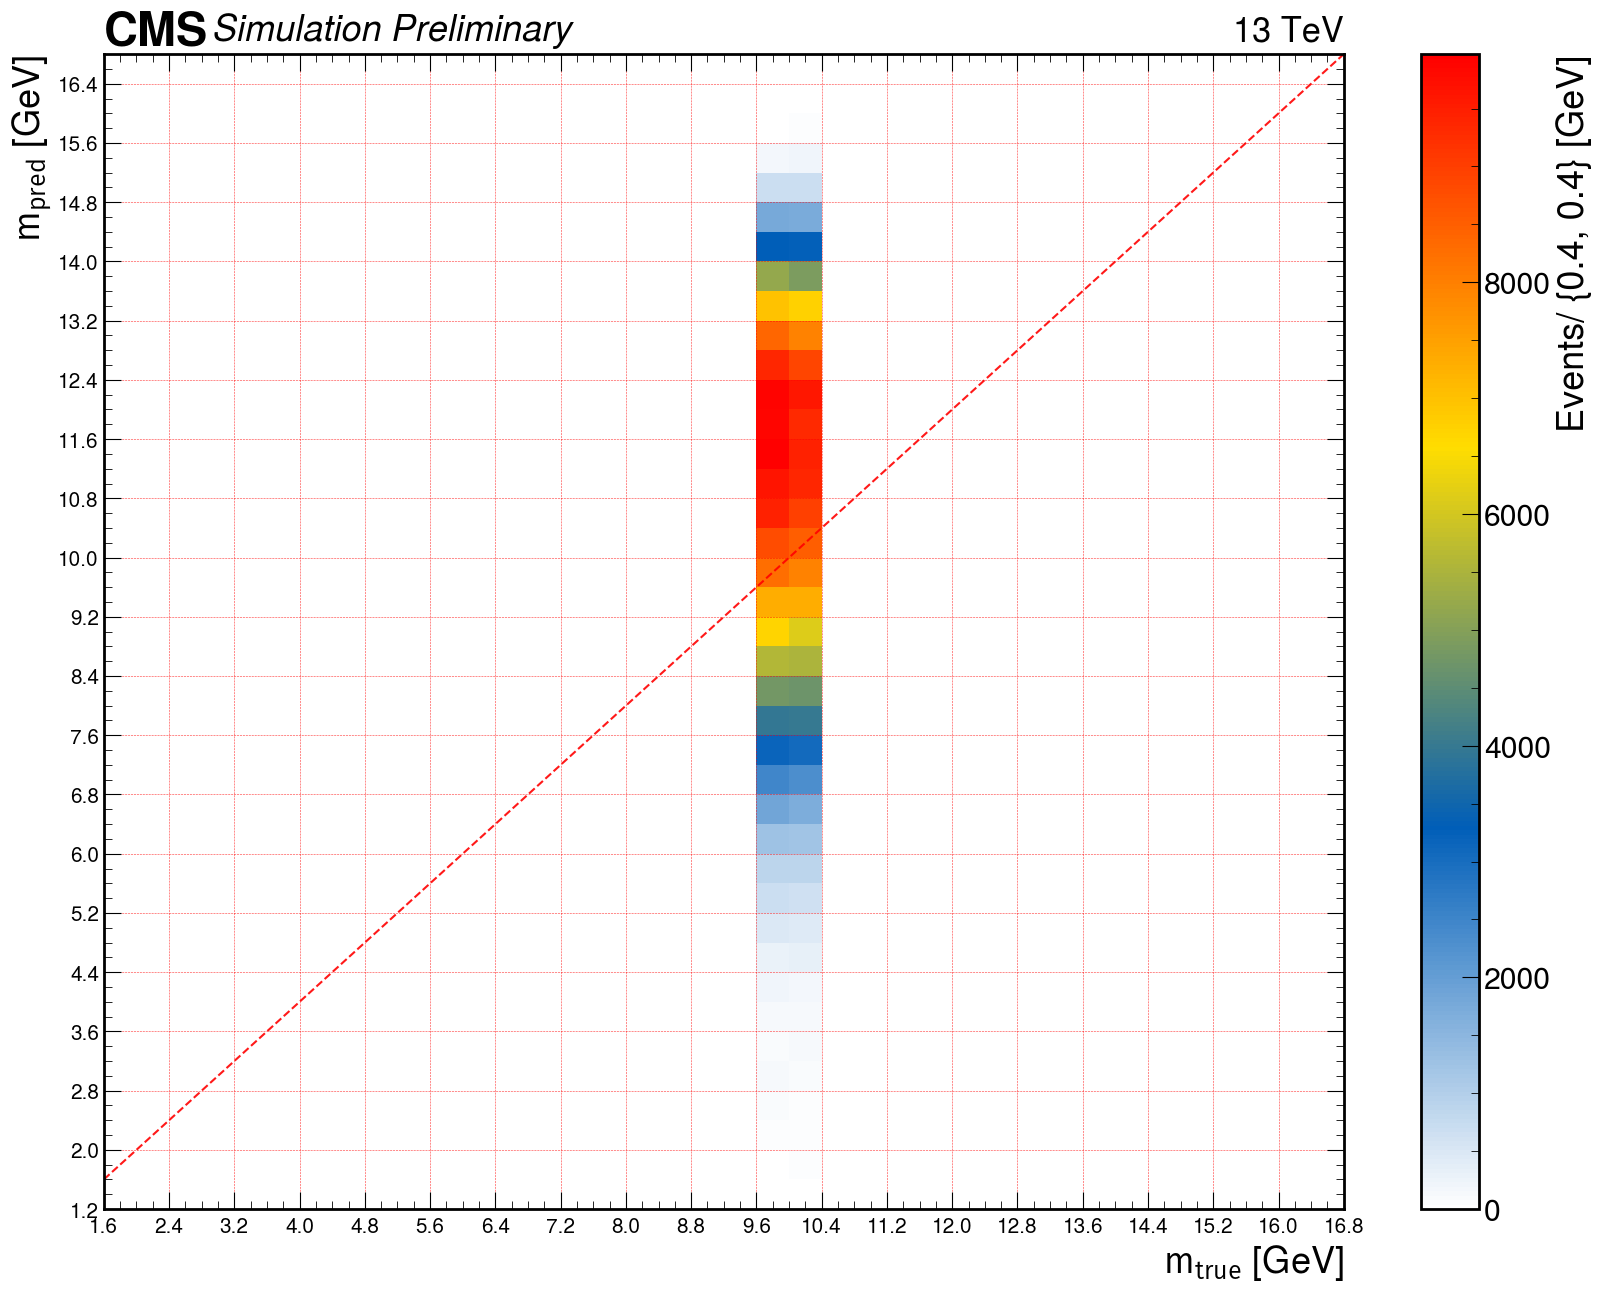

In [99]:
true_prediction_gaussian_filt(data_file = "../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_10_H_AA_4Tau/*")


# Signal M = 12 GeV

loaded data file ------>  ../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_12_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.7490_inference_data.pkl


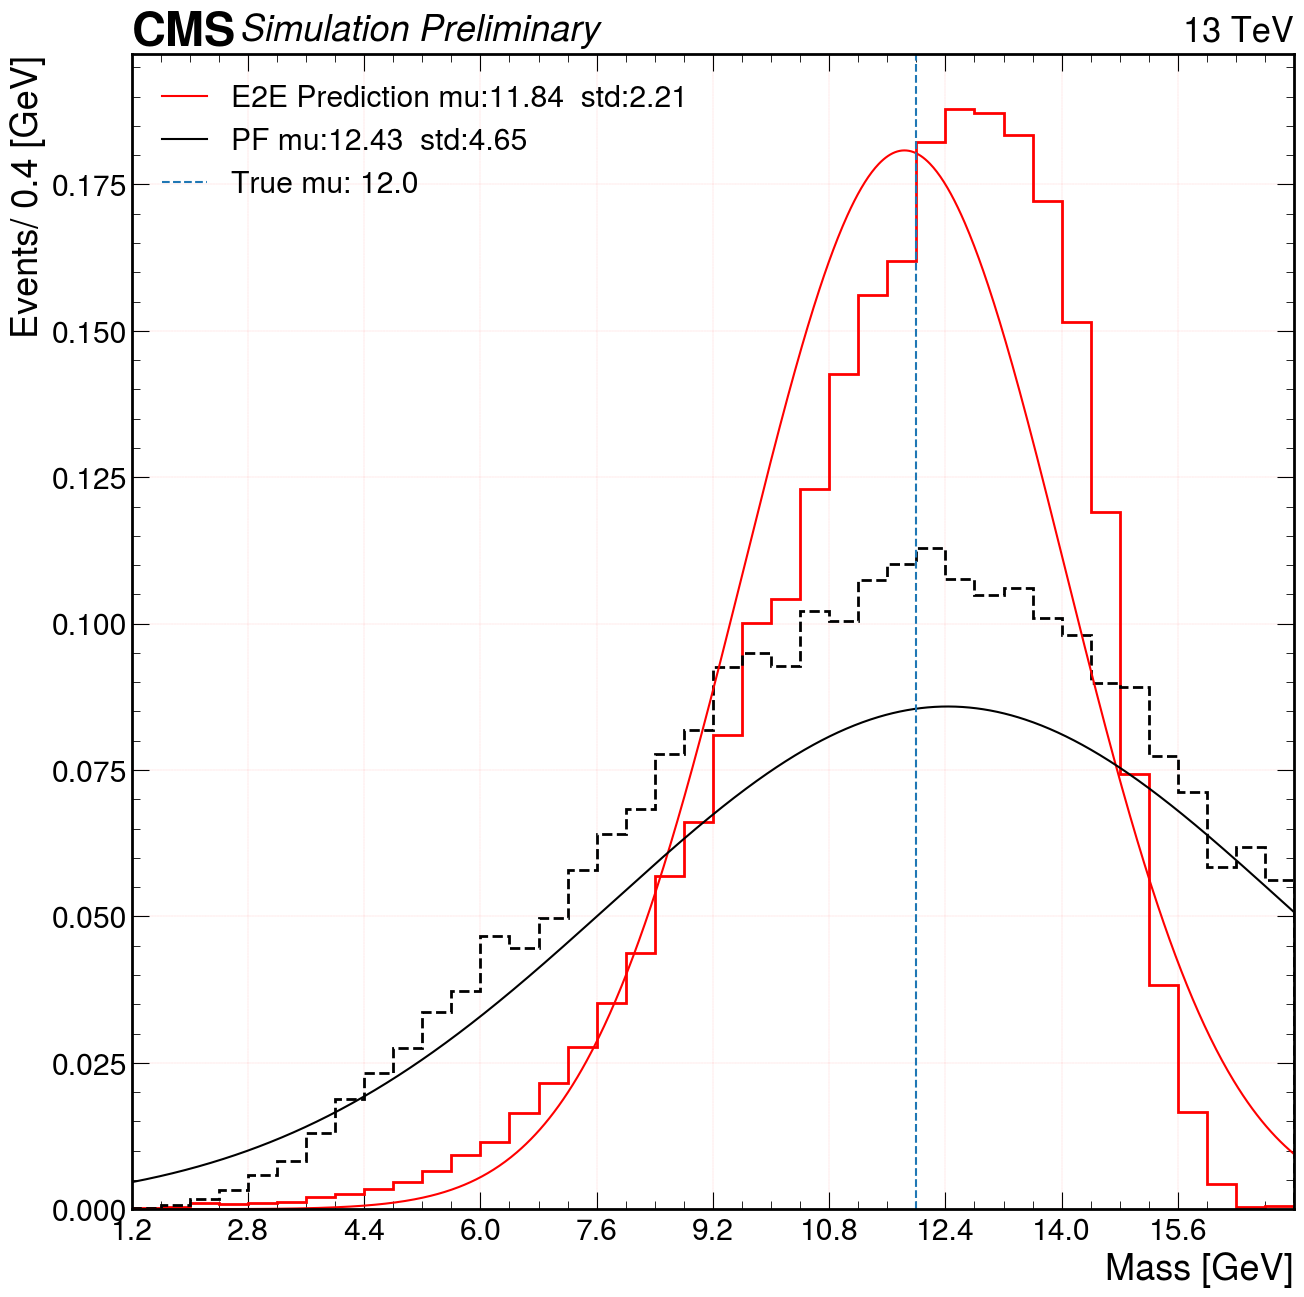

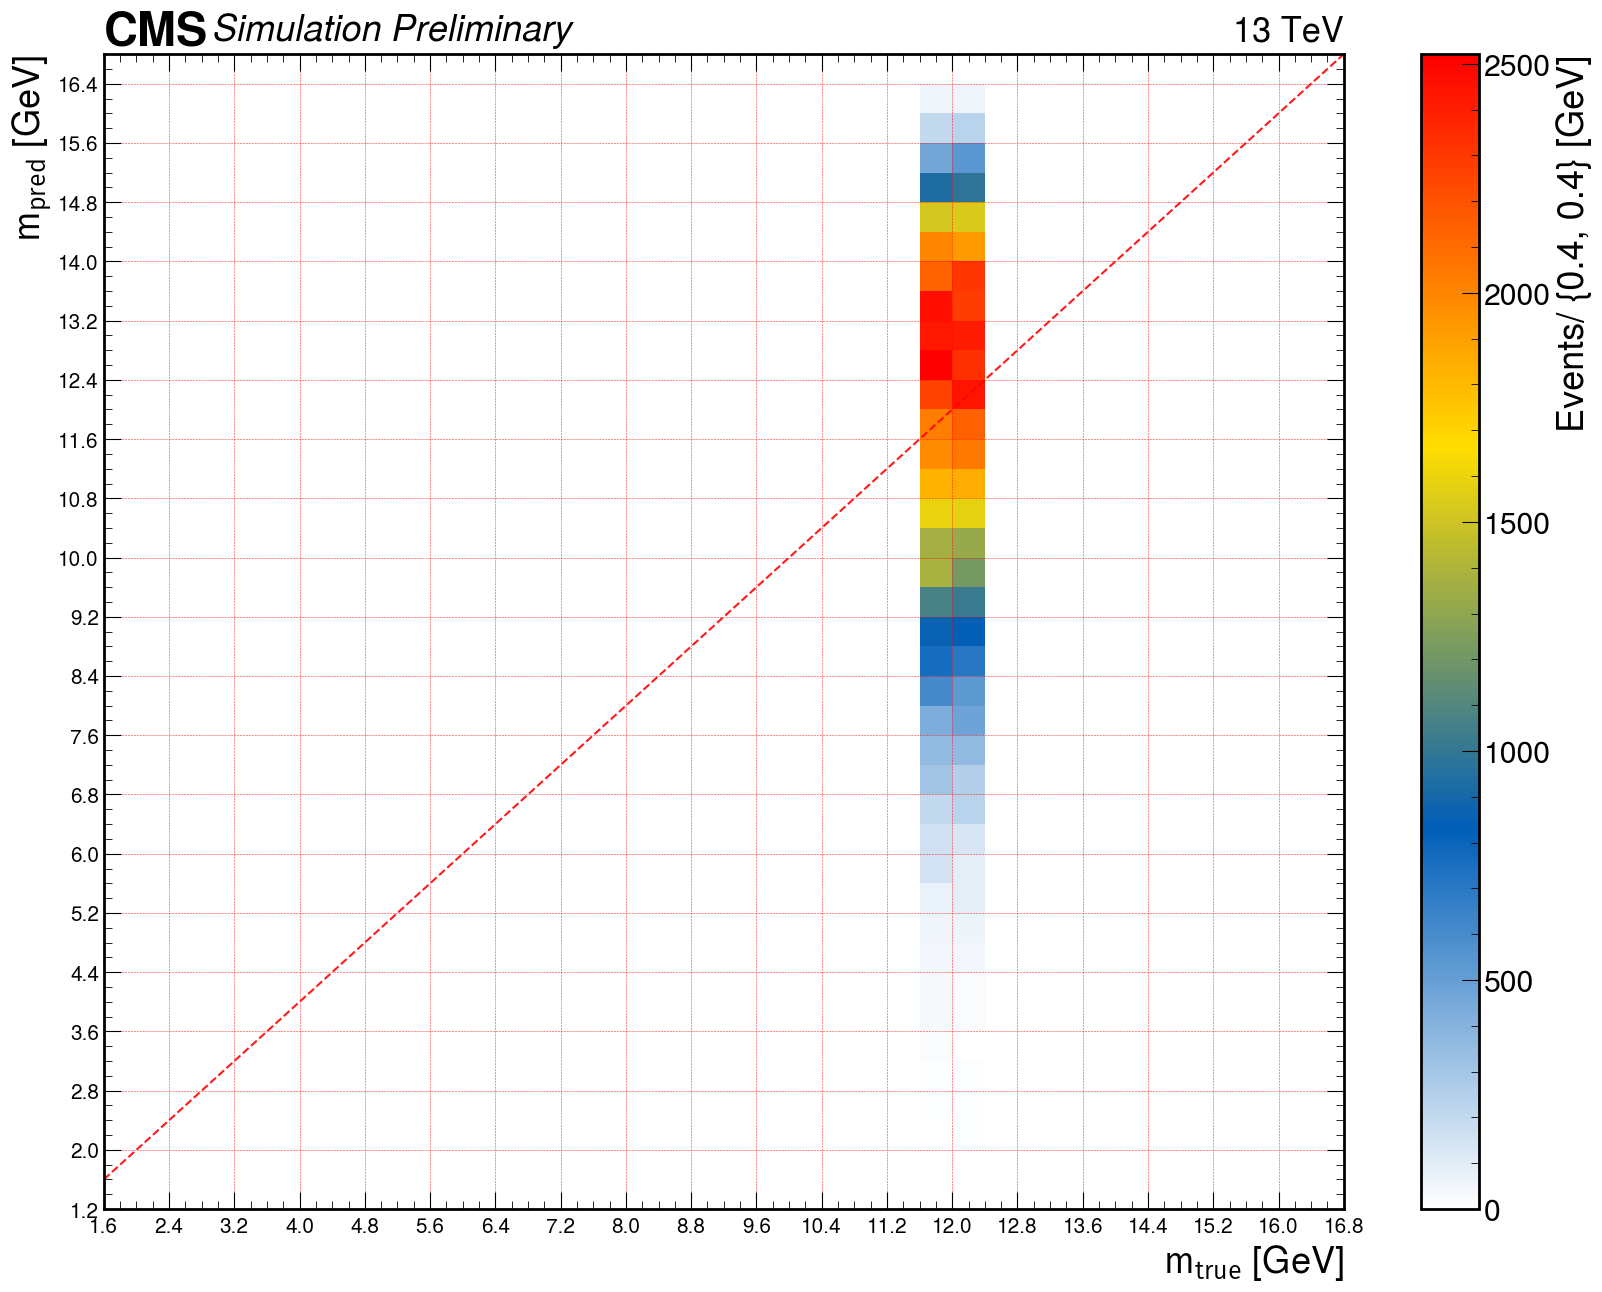

In [100]:
true_prediction_gaussian_filt(data_file = "../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_12_H_AA_4Tau/*")

# Signal M=14 GeV

loaded data file ------>  ../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_14_H_AA_4Tau/epoch30_val_pseudoscalar_mae1.7863_inference_data.pkl


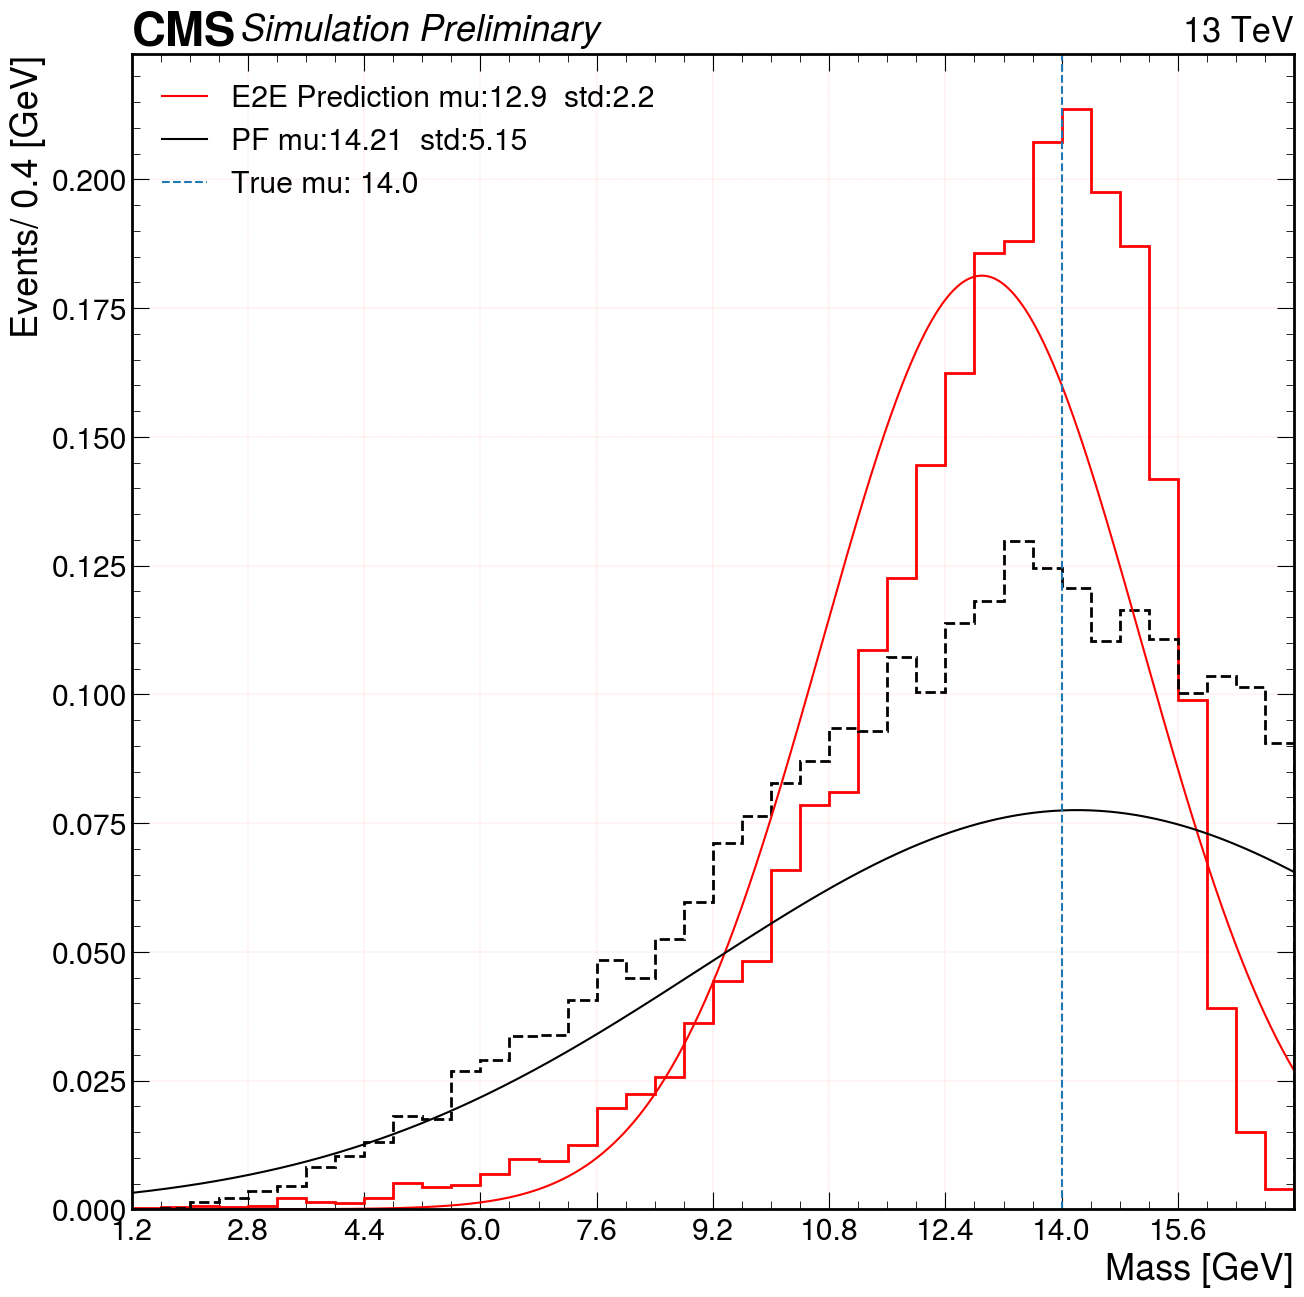

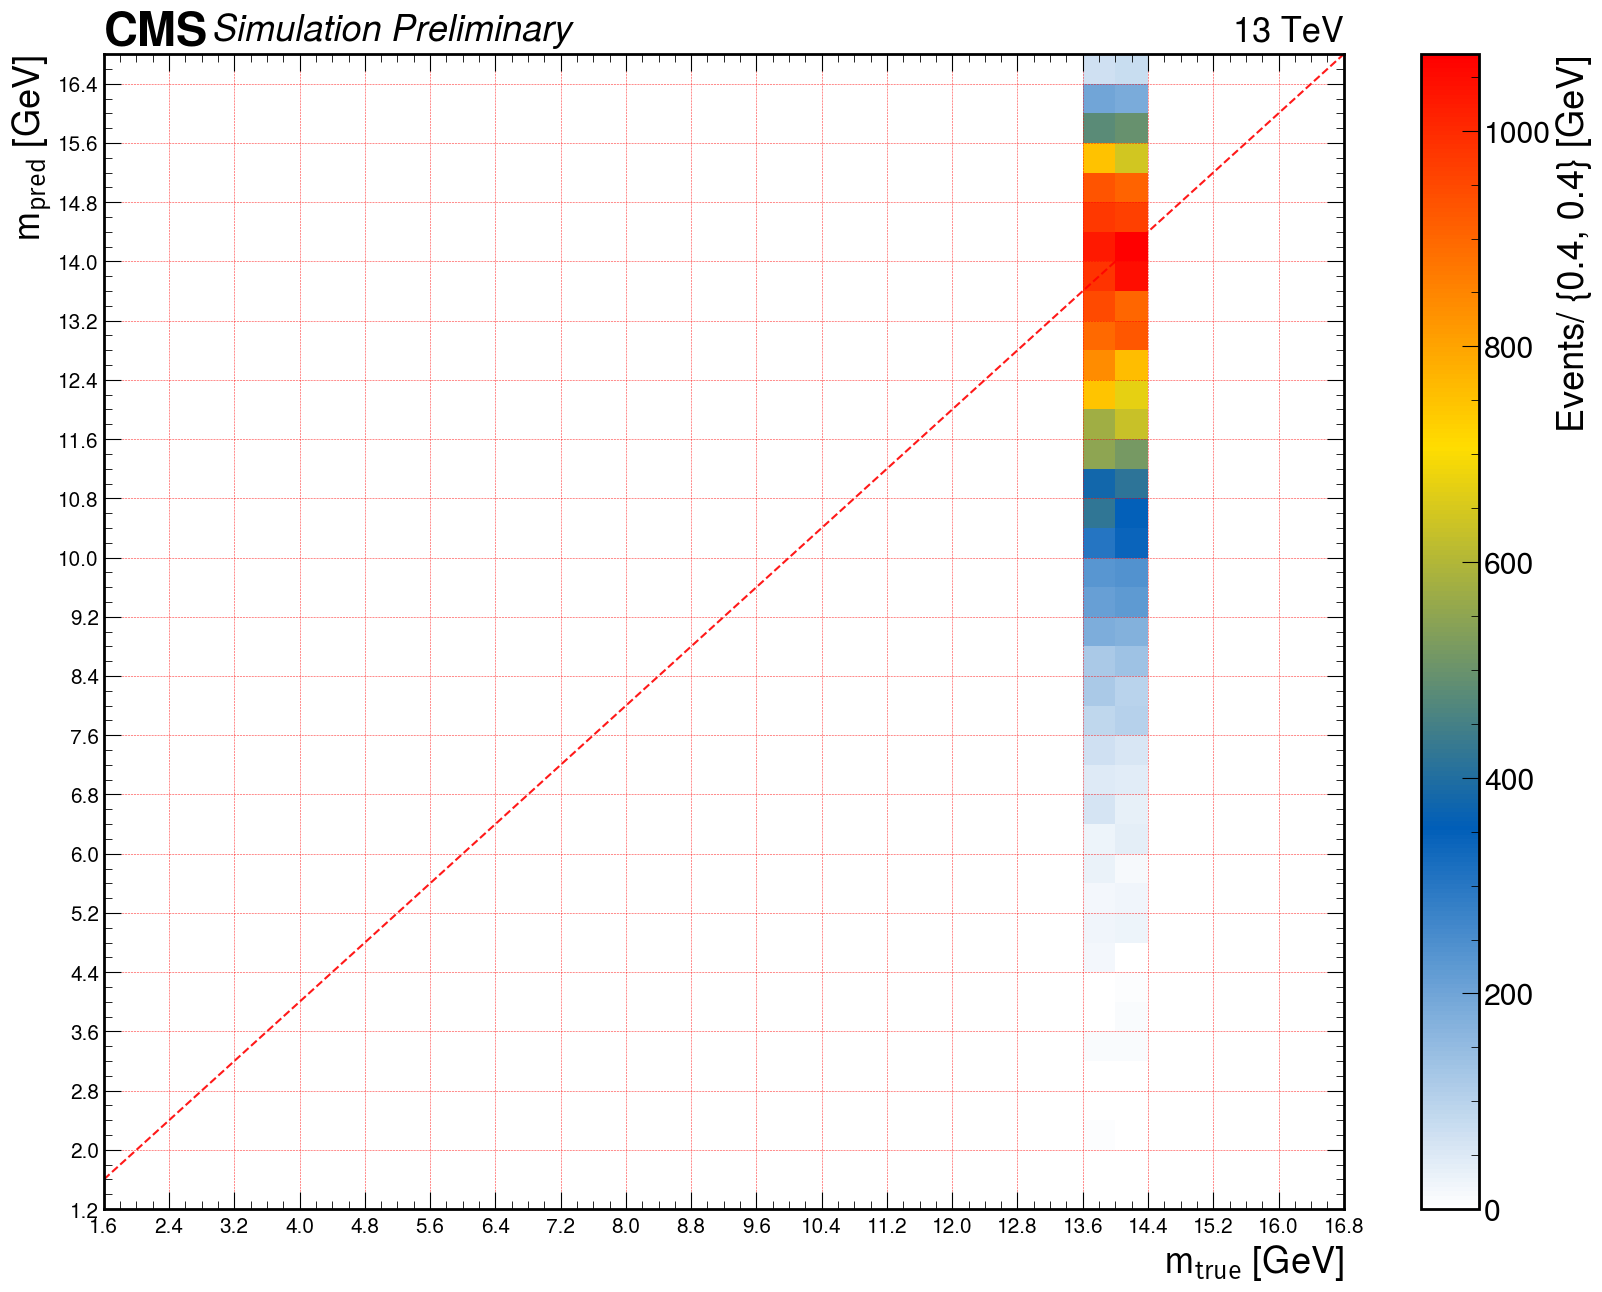

In [101]:
true_prediction_gaussian_filt(data_file = "../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_14_H_AA_4Tau/*")

In [ ]:
# Resnet101

loaded data file ------>  /pscratch/sd/b/bbbam/mass_reg_without_eta_phi_M3p7_101/Interference_13_channels_massregressor_resnet101/INFERENCE_DATA/epoch4__mae2.6976_inference_data.pkl


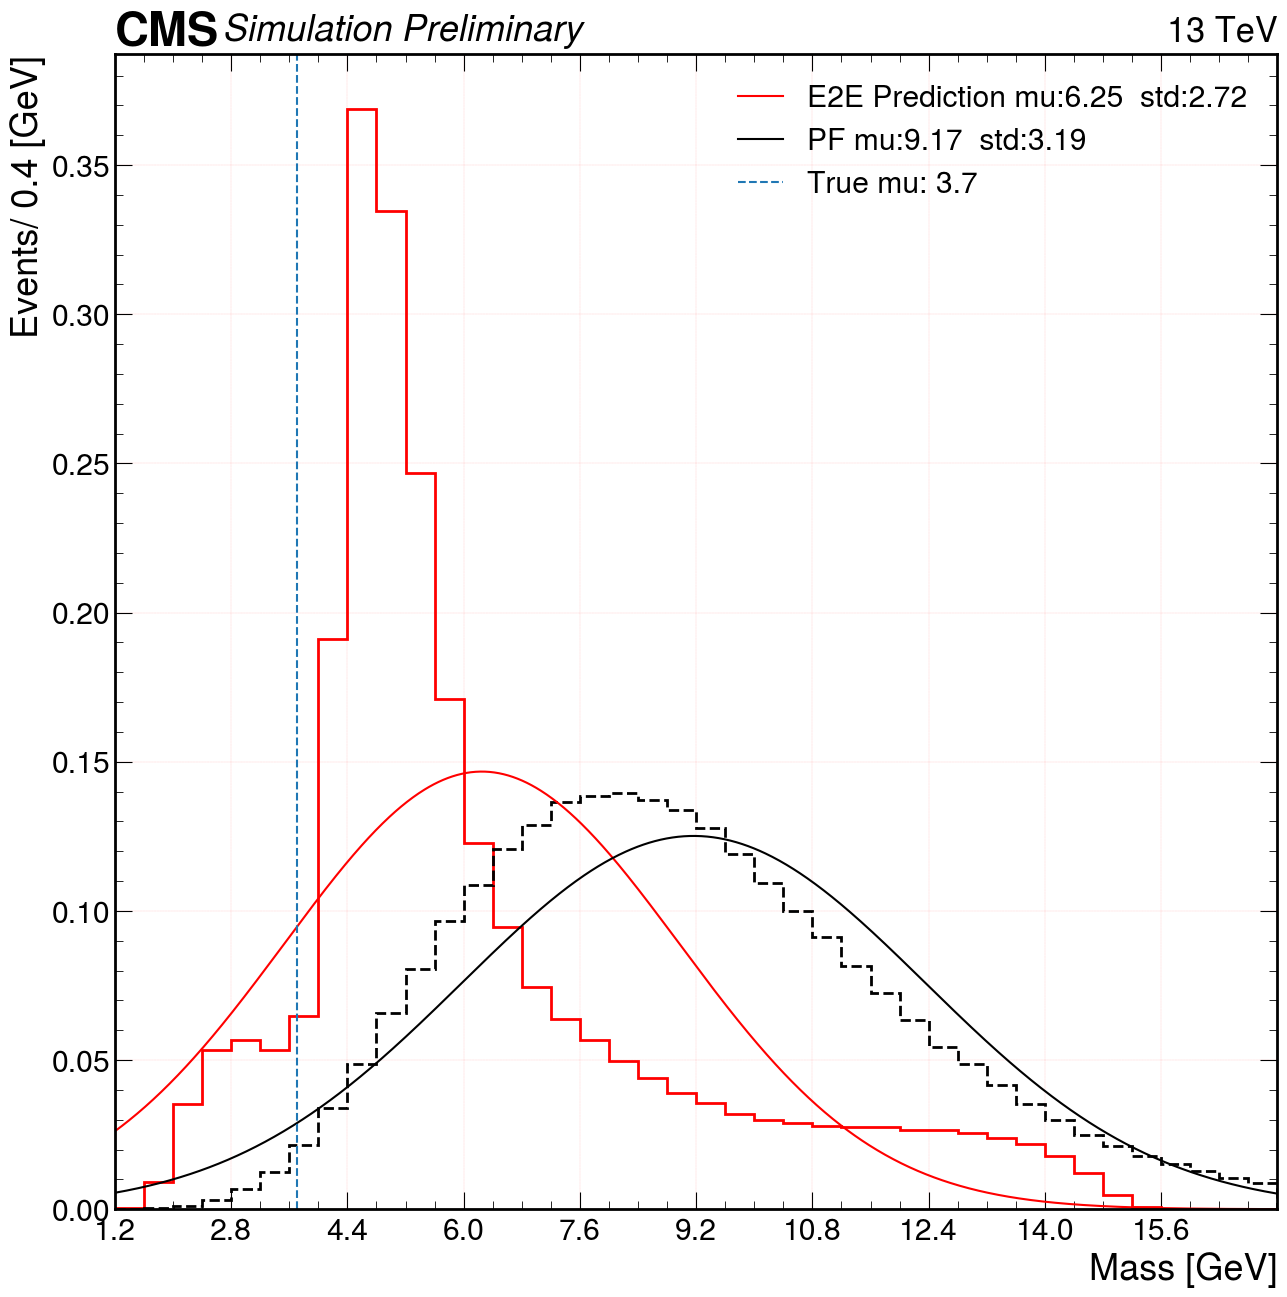

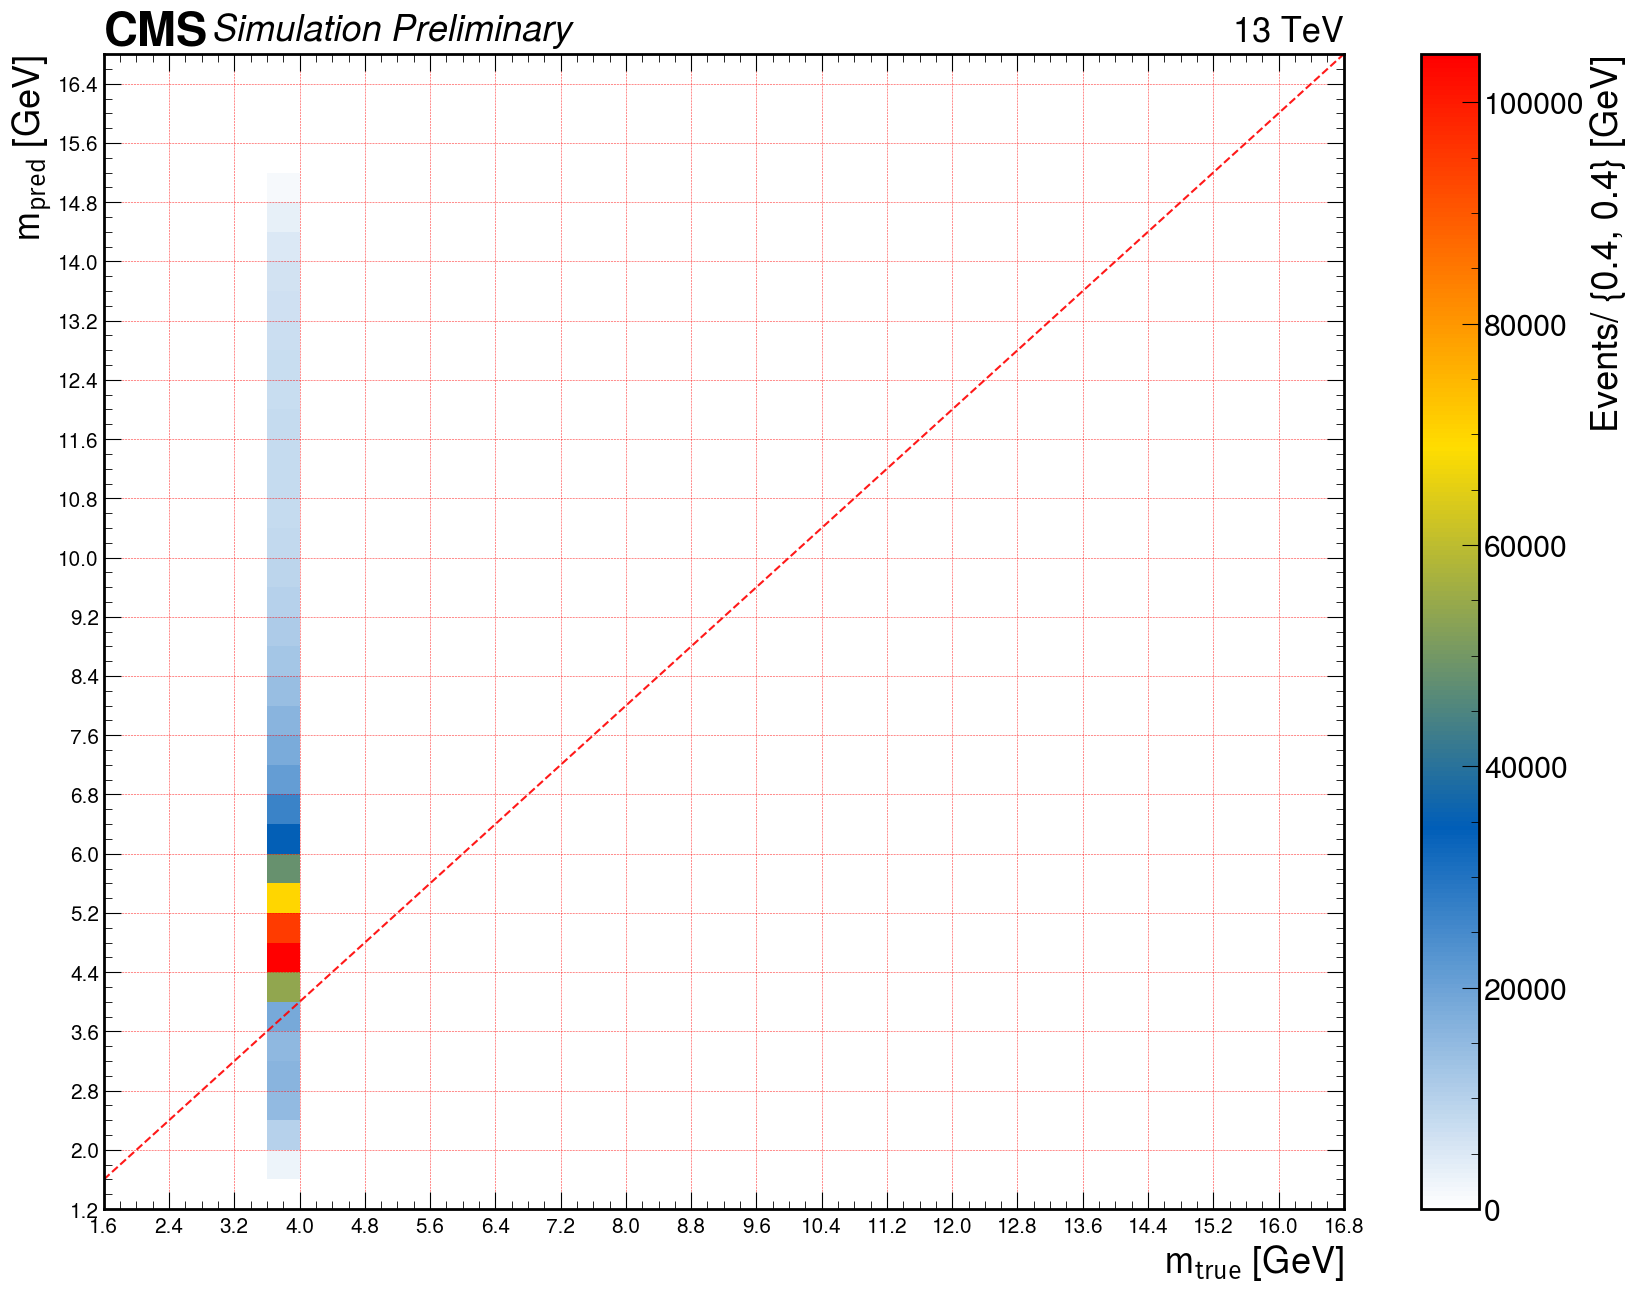

In [102]:
true_prediction_gaussian_filt(data_file = "/pscratch/sd/b/bbbam/mass_reg_without_eta_phi_M3p7_101/Interference_13_channels_massregressor_resnet101/INFERENCE_DATA/*")

loaded data file ------>  /pscratch/sd/b/bbbam/mass_reg_without_eta_phi_M5_101/Interference_13_channels_massregressor_resnet101/INFERENCE_DATA/epoch4__mae2.0537_inference_data.pkl


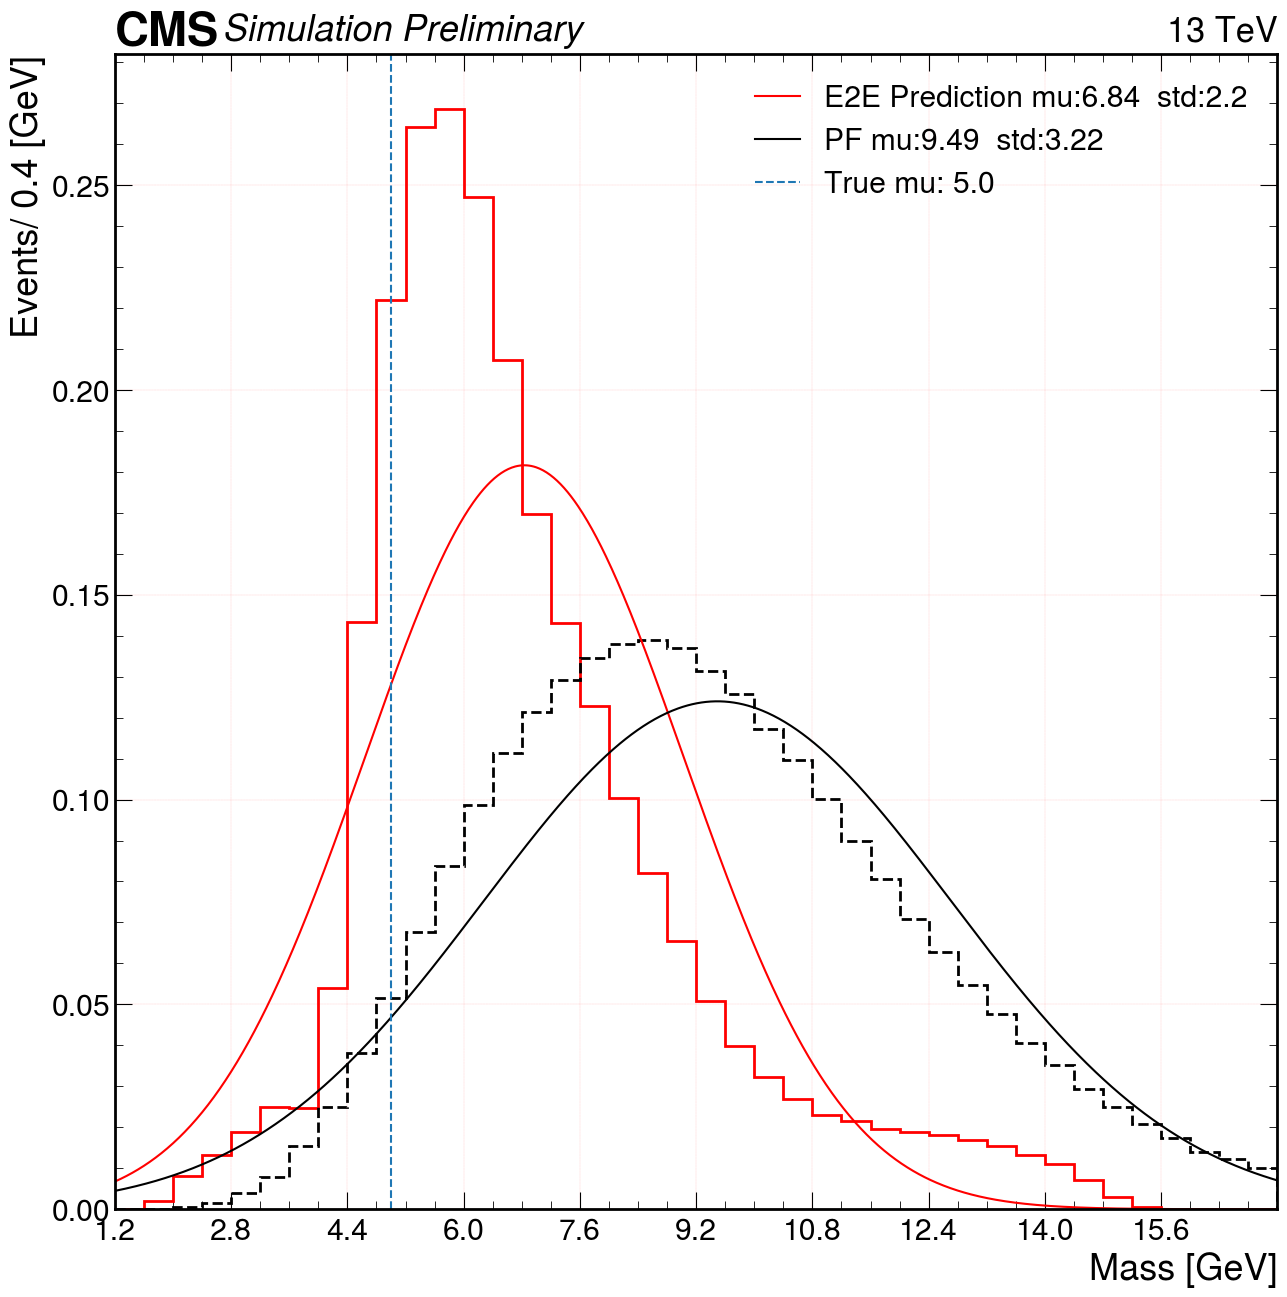

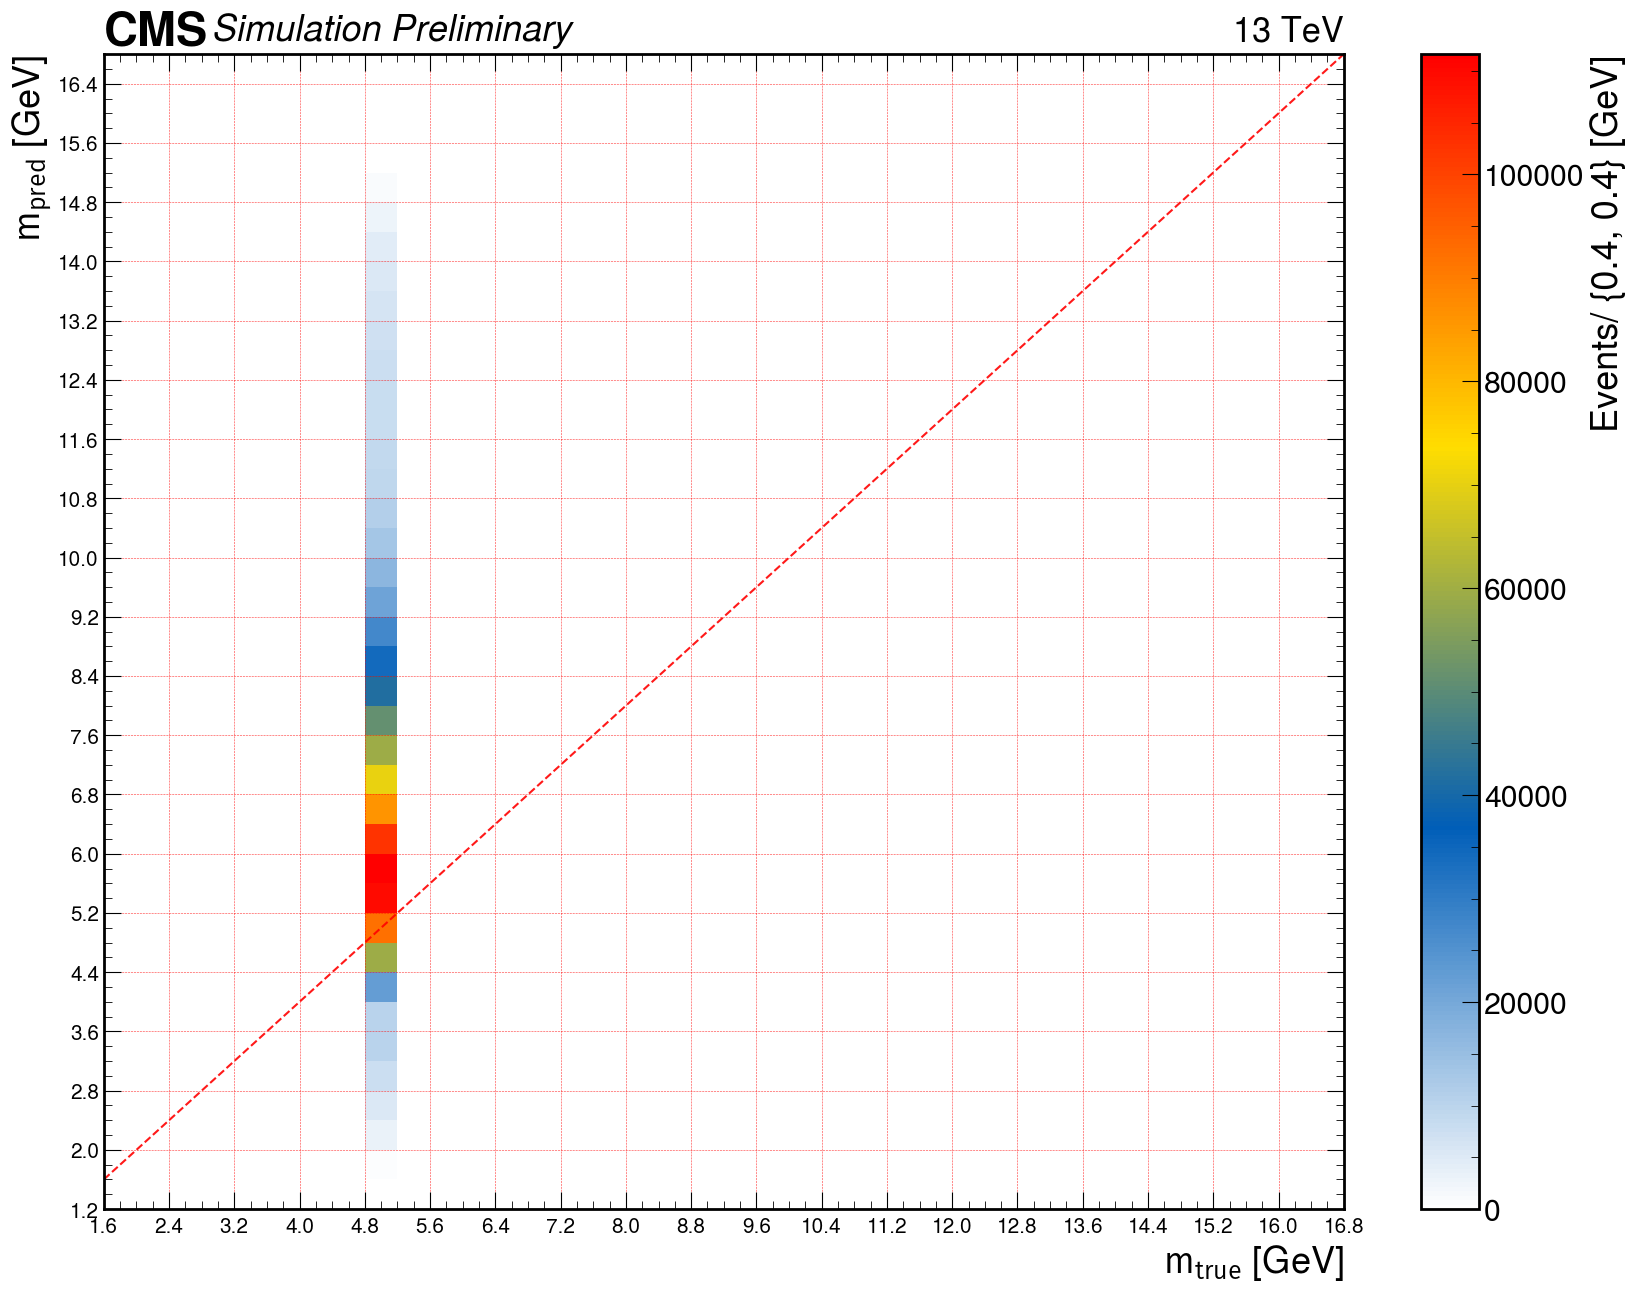

In [103]:
true_prediction_gaussian_filt(data_file = "/pscratch/sd/b/bbbam/mass_reg_without_eta_phi_M5_101/Interference_13_channels_massregressor_resnet101/INFERENCE_DATA/*")